# Lead Scoring Case study

## Problem statement

An education company named X Education sells online courses to industry professionals.
On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google.
Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.
When these people fill up a form providing their email address or phone number, they are classified to be a lead.
Moreover, the company also gets leads through past referrals. Once these leads are acquired, 
employees from the sales team start making calls, writing emails, etc. 
Through this process, some of the leads get converted while most do not. 
The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor.
For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted.
To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’.
If they successfully identify this set of leads, the lead conversion rate should go up as 
the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

### Goals of the Case Study


Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### Step 1: Importing The libraries

In [1]:
#importing libraries
import pandas as pd, numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

#supressing warnings
import warnings
warnings.filterwarnings('ignore')

#Setting up view options in jupyter
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

### Step 2: Importing the data and Inspecting dataframe

In [2]:
data = pd.read_csv("../data/Leads.csv")

In [3]:
data.shape

(9240, 37)

In [4]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Step 3: Data Cleaning

### 3.1 To handle Duplicate rows

We check for duplicte rows using unique identifiers

For our data "Prospect ID"  and "Lead Number" are the identifiers.

In [7]:
print("Total number of duplicate values w.r.t Prospect ID column :" , data.duplicated(subset = 'Prospect ID').sum())
print("Total number of duplicate values w.r.t Lead Number column :" , data.duplicated(subset = 'Lead Number').sum())


Total number of duplicate values w.r.t Prospect ID column : 0
Total number of duplicate values w.r.t Lead Number column : 0


<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -  There are no duplicates in the data

    </span>
</div>

### 3.2 To Drop the colums that have no analytical significance

We can drop "Prospect ID"  and "Lead Number" as they are used to just identify lead
Last Notable Activity being The last notable acitivity performed by the student, is not relevent in finding hot leads

In [8]:
data.drop(["Prospect ID","Lead Number","Last Notable Activity"] , axis =1, inplace = True)

### 3.3 To handle Columns with Null values indicated using other notations

Some times the null values are also indicated by using -NA-, Select, - , NaN and other formats.

This is most probably because the person has not filled that field or the data has been extracted from different sources.

Let's find for those and convert them to proper null values

In [9]:
#Converting 'Select' values to NaN.

data.replace('Select', np.nan , inplace=True)

data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No


### 3.4 To handle Columns with Null values

#### To find the % Null values in the data

In [10]:
round(data.isnull().mean()*100)

Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                   

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -  There are 16 columns with null values
        
  -  8 columns has more than 40% of null values
        
  -  5 columns have less than 20% of null values
    </span>
</div>

#### To drop the colums with hig null values (to remove bias in the data)

In [11]:
#dropping cols with more than 45% missing values
columns_to_drop = [i for i in data.columns if data[i].isnull().mean() >= 0.45]
print("Columns with more than or equal to 45% null are : ",columns_to_drop)
data.drop(columns_to_drop , axis =1, inplace = True)

Columns with more than or equal to 45% null are :  ['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [12]:
print("After cleaning the data \n Number of Row          :",len(data.index),"\n Number of Columns      :",len(data.columns))

After cleaning the data 
 Number of Row          : 9240 
 Number of Columns      : 27


##### Imputation of null values are done once the data's nature is seen, The data is segregated into categorical and numerical. then they are individually inspedted then a decision is taken

### 3.4.1 To segregate Categotical and numerical data

In [13]:
categorical_col = data.select_dtypes(exclude =["number"]).columns.values
numerical_col = data.select_dtypes(include =["number"]).columns.values
print("CATEGORICAL FEATURES : \n {} \n\n".format(categorical_col))
print("NUMERICAL FEATURES : \n {} ".format(numerical_col))

CATEGORICAL FEATURES : 
 ['Lead Origin' 'Lead Source' 'Do Not Email' 'Do Not Call' 'Last Activity'
 'Country' 'Specialization' 'What is your current occupation'
 'What matters most to you in choosing a course' 'Search' 'Magazine'
 'Newspaper Article' 'X Education Forums' 'Newspaper'
 'Digital Advertisement' 'Through Recommendations'
 'Receive More Updates About Our Courses' 'Tags'
 'Update me on Supply Chain Content' 'Get updates on DM Content' 'City'
 'I agree to pay the amount through cheque'
 'A free copy of Mastering The Interview'] 


NUMERICAL FEATURES : 
 ['Converted' 'TotalVisits' 'Total Time Spent on Website'
 'Page Views Per Visit'] 


### 3.4.2 null value treatment of categorical columns

In [14]:
# Checking unique values and null values for the categorical columns
def categorical_info(df, categorical_column):
    df_result = pd.DataFrame(columns=["columns","unique_values","null_percent"])
    
    df_temp=pd.DataFrame()
    for value in categorical_column:
        df_temp["columns"] = [value]
        df_temp["unique_values"] = df[value].nunique()
        df_temp["null_percent"] = (df[value].isna().sum()/len(df)*100).round(1)
        df_result = df_result.append(df_temp)
    
    df_result.sort_values("null_percent", ascending =False, inplace=True)
    df_result.set_index("columns", inplace=True)
    return df_result

In [15]:
categorical_info(data, categorical_col)

,unique_values,null_percent
columns,,
City,6,39.7
Specialization,18,36.6
Tags,26,36.3
What matters most to you in choosing a course,3,29.3
What is your current occupation,6,29.1
Country,38,26.6
Last Activity,17,1.1
Lead Source,21,0.4
Lead Origin,5,0.0


<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -  There are 5 columns with only one value, There are not usefull for the analysis and can be dropped
        
  -  8 columns need imputation for null values
        
  -  5 columns have less than 20% of null values
    </span>
</div>

In [16]:
columns_to_drop = [i for i in data.columns if data[i].nunique() == 1]
print("Coulmns with only one value (to be drop) : ",columns_to_drop)
data.drop(columns_to_drop , axis =1, inplace = True)

Coulmns with only one value (to be drop) :  ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


#### Now we start with each of the columns left

### City

In [17]:
data['City'].value_counts(dropna=False,normalize=True)*100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -  40 % of the columns are null
        
  -  Imputing with any one value will introduce bias and the results will be skewed.
        
  -  As online education is available from any city, this column city with missing values won't make any sense. Hence will drop this column
    </span>
</div>

In [18]:
data.drop("City",axis=1, inplace = True)

### Specialization

In [19]:
data['Specialization'].value_counts(dropna=False,normalize = True)*100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -  Absence value could be because the user is a student and so has no specialisation , it could also be due the non availability of the specialistion to choose from.
        
  -  The best approach is to label them as "Others" category.
         
    </span>
</div>

In [20]:
data['Specialization'].replace(np.nan, 'Others', inplace = True)

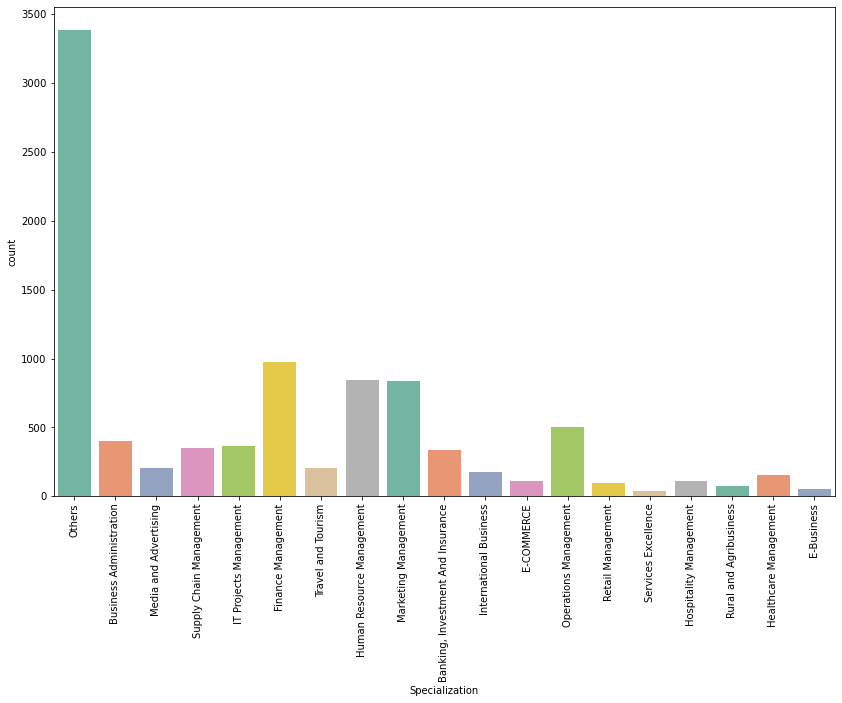

In [21]:
plt.figure(figsize=(14,9))
sns.countplot(data['Specialization'],palette = 'Set2')
plt.yticks(fontsize=10)
plt.xticks(rotation = 90, fontsize=10)
plt.show()

### Tags

In [22]:
data['Tags'].value_counts(dropna=False,normalize = True)*100

NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
 -  36 % of the columns are null, Imputing with any one value will introduce bias and the results will be skewed.

 -  15 columns have less than 1% share in the data.
        
 -  These details comes into picture when Client is already contacted once and is in progress. These wont help in predicting for the first time which is our goal.

 - Hence for the above reason we are dropping the column
         
    </span>
</div>

In [23]:
data.drop("Tags",axis=1, inplace = True)

### What matters most to you in choosing a course

In [24]:
data['What matters most to you in choosing a course'].value_counts(dropna=False,normalize = True)*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -   The data is skewed even without considering the null values , hence this can be dropped
         
    </span>
</div>

In [25]:
data.drop("What matters most to you in choosing a course",axis=1, inplace = True)

### What is your current occupation

In [26]:
data['What is your current occupation'].value_counts(dropna=False,normalize = True)*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -   The Data is already skewd beacause of unemployment element share. 
  -   There already exists an column named others, So leats dupm the null values as "Not Available"
         
    </span>
</div>

In [27]:
data['What is your current occupation'].replace(np.nan, 'Not Available', inplace = True)

### Country

In [28]:
data['Country'].value_counts(dropna=False,normalize = True)*100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Nigeria                  0.043290
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Germany                  0.043290
Sweden                   0.032468
Bangladesh               0.021645
China                    0.021645
Italy                    0.021645
Uganda                   0.021645
Belgium                  0.021645
Asia/Pacific Region      0.021645
Philippines              0.021645
Ghana                    0.021645
Netherlands              0.021645
Switzerland   

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -   The data is too skewed towards one single country.
  -   Imputing will add bias. Also due to skewness the data might not contribute much. Hence droping the column
         
    </span>
</div>

In [29]:
data.drop('Country',axis=1, inplace = True)

### Last Activity

In [30]:
data['Last Activity'].value_counts(dropna=False,normalize = True)*100

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -   The null values are small to cause bias
  -   Let's impute with mode. ie with "Email Opened"
         
    </span>
</div>

In [31]:
data['Last Activity'].fillna(data['Last Activity'].mode()[0], inplace=True)

### Lead Source

In [32]:
data['Lead Source'].value_counts(dropna=False,normalize = True)*100

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Social Media          0.021645
Live Chat             0.021645
Press_Release         0.021645
blog                  0.010823
welearnblog_Home      0.010823
testone               0.010823
WeLearn               0.010823
youtubechannel        0.010823
NC_EDM                0.010823
Pay per Click Ads     0.010823
Name: Lead Source, dtype: float64

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -   The null values are small to cause bias
  -   Let's impute with mode. ie with "Google"
  -   There's google and Google. let's wait tillt the EDA to see if there is any importance and then merge.
         
    </span>
</div>

In [33]:
data['Lead Source'].fillna(data['Last Activity'].mode()[0], inplace=True)

### 3.4.3 null value treatment of Numerical columns

In [34]:
# Checking unique values and null values for the categorical columns
def Numerical_info(df, numeric_column):
    df_result = pd.DataFrame(columns=["columns","null_percent"])
    
    df_temp=pd.DataFrame()
    for value in numeric_column:
        df_temp["columns"] = [value]
        df_temp["null_percent"] = (df[value].isna().sum()/len(df)*100).round(1)
        df_result = df_result.append(df_temp)
    
    df_result.sort_values("null_percent", ascending =False, inplace=True)
    df_result.set_index("columns", inplace=True)
    return df_result

In [35]:
Numerical_info(data,numerical_col)

,null_percent
columns,
TotalVisits,1.5
Page Views Per Visit,1.5
Converted,0.0
Total Time Spent on Website,0.0


### TotalVisits	

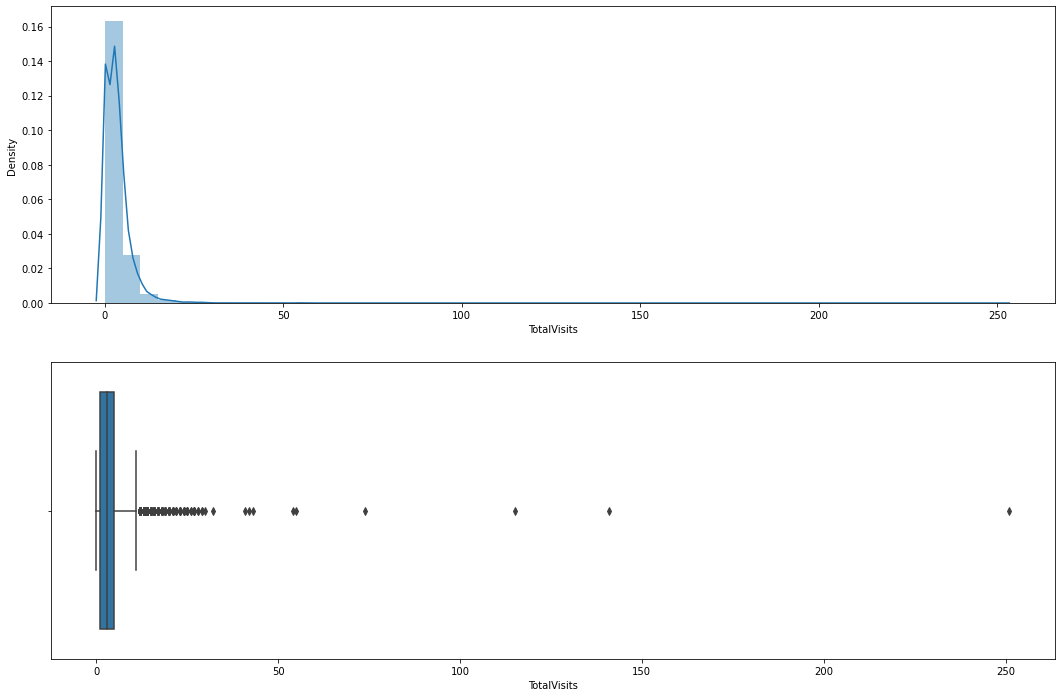

In [36]:
plt.figure(figsize = (18,12))
plt.subplot(2,1,1)
sns.distplot(data['TotalVisits'])
plt.subplot(2,1,2)
sns.boxplot(data['TotalVisits'])
plt.show()

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -   There are outliers in the data.
  -   The null values cannot be imputed with mean due to outliers, will use median to impute.
         
    </span>
</div>

In [37]:
data['TotalVisits'].median()

3.0

In [38]:
data['TotalVisits'].fillna(data['TotalVisits'].median(), inplace=True)

### Page Views Per Visit

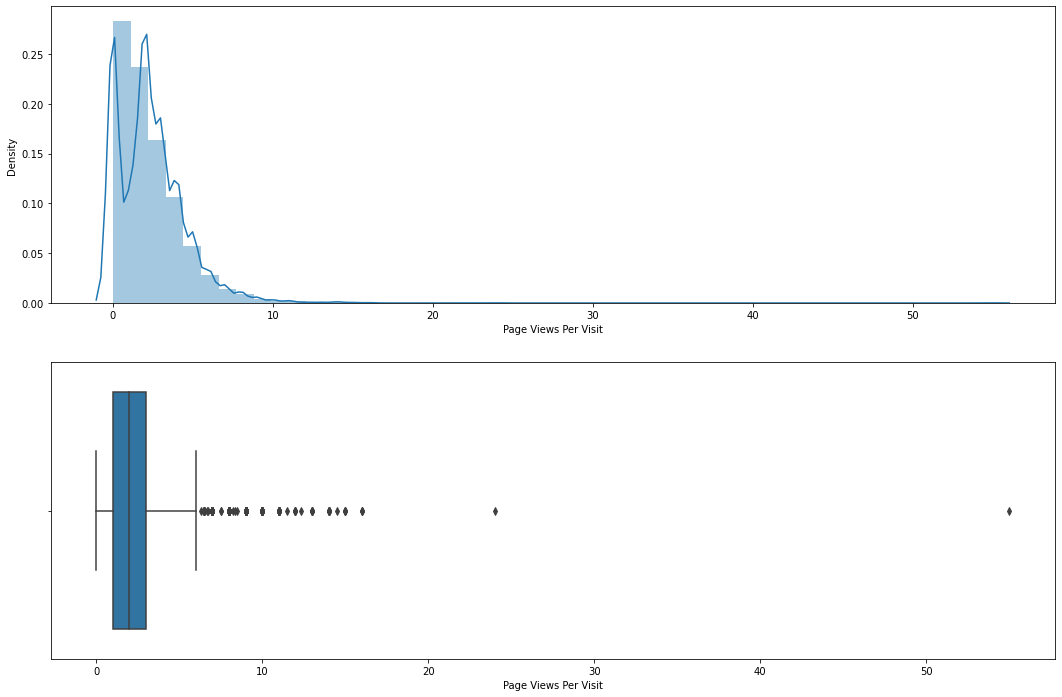

In [39]:
plt.figure(figsize = (18,12))
plt.subplot(2,1,1)
sns.distplot(data['Page Views Per Visit'])
plt.subplot(2,1,2)
sns.boxplot(data['Page Views Per Visit'])
plt.show()

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -   There are outliers in the data.
  -   The null values cannot be imputed with mean due to outliers, will use median to impute.
         
    </span>
</div>

In [40]:
data['Page Views Per Visit'].median()

2.0

In [41]:
data['Page Views Per Visit'].fillna(data['Page Views Per Visit'].median(), inplace=True)

### 3.5 Checking for imbalance

In [42]:
data['Converted'].value_counts(dropna=False,normalize = True)*100

0    61.461039
1    38.538961
Name: Converted, dtype: float64

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -   There are 38.54% people converted and 61.46% people who didn't
  -   The Converted column looks balanced
         
    </span>
</div>

### 3.6 To rename the columns

In [43]:
# Renaming some of the column which has long Column names

data.rename(columns={
    'What is your current occupation': 'Occupation', 
    'Through Recommendations': 'Recommendation',
    'A free copy of Mastering The Interview': 'Free Book'                   
},inplace = True)

data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization', 'Occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Recommendation', 'Free Book'],
      dtype='object')

In [44]:
#Let's checkthe shape after cleaning
data.shape

(9240, 18)

### Step 4: Univariate Analysis and Bivariate Analysis

In [45]:
#once again let's check the columns
categorical_col = data.select_dtypes(exclude =["number"]).columns.values
numerical_col = data.select_dtypes(include =["number"]).columns.values
print("CATEGORICAL FEATURES : \n {} \n\n".format(categorical_col))
print("NUMERICAL FEATURES : \n {} ".format(numerical_col))

CATEGORICAL FEATURES : 
 ['Lead Origin' 'Lead Source' 'Do Not Email' 'Do Not Call' 'Last Activity'
 'Specialization' 'Occupation' 'Search' 'Newspaper Article'
 'X Education Forums' 'Newspaper' 'Digital Advertisement' 'Recommendation'
 'Free Book'] 


NUMERICAL FEATURES : 
 ['Converted' 'TotalVisits' 'Total Time Spent on Website'
 'Page Views Per Visit'] 


### 4.1 Univariate Analysis for Numerical variable

In [46]:
# To reduce redundancy let's make a function.
# input being the column to analyse and output Histogram and boxplot for converted and non-converted
def numerical_univariate(column_name):
    plt.figure(figsize=(18,14))
    plt.subplot(2,1,1)
    plt.title('Histogram for "{}"'.format(column_name))
    sns.distplot(data[column_name])
    plt.subplot(2,1,2)
    plt.title('Box plot for "{}"'.format(column_name))
    sns.boxplot(y='Converted', x = column_name, data=data, orient = 'h')
    
    plt.show()

#### TotalVisits

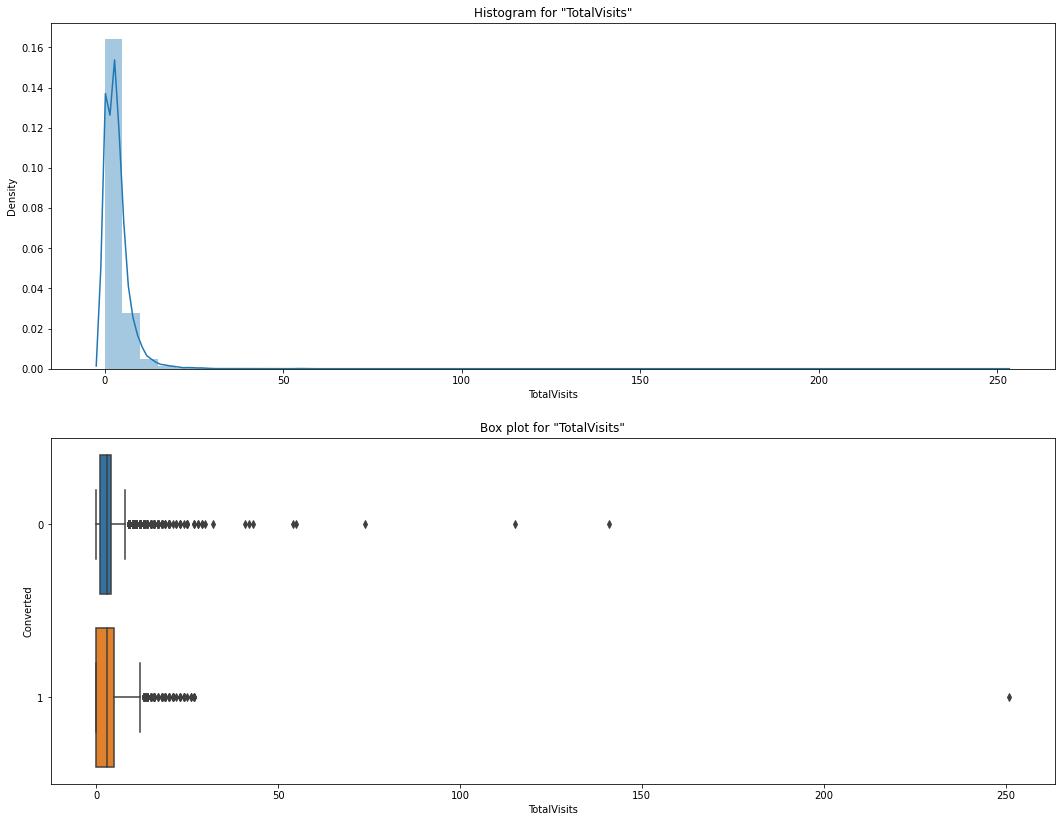

In [47]:
numerical_univariate('TotalVisits')

#### Total Time Spent on Website

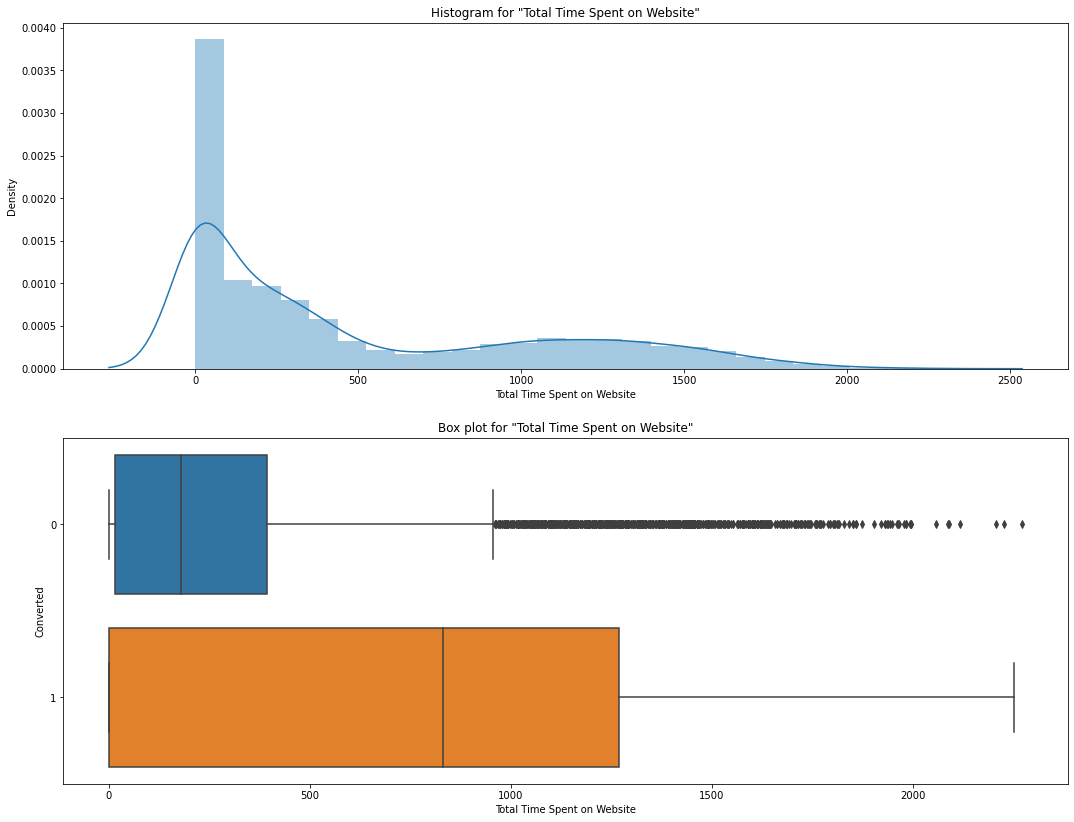

In [48]:
numerical_univariate( 'Total Time Spent on Website')

#### Page Views Per Visit

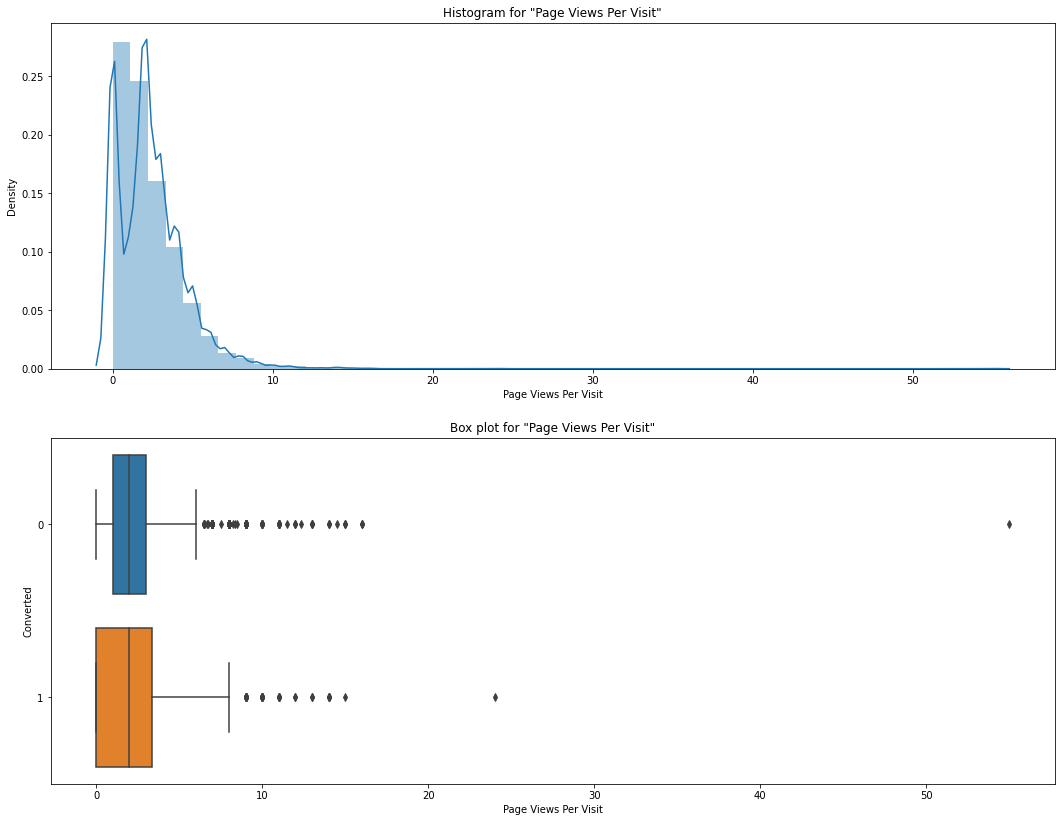

In [49]:
numerical_univariate('Page Views Per Visit')

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -   Clearly there are outliers in Data
  -   Mean of page visits are nearly same for people who converted and who didn't
  -   People who spent more time on pages per visit have more chances of conversion
  -   Mean of page views per visit is same for people who convert and who don't
         
    </span>
</div>

### 4.2 Univariate Analysis for Categorical variable

In [50]:
# To reduce redundancy let's make a function.
# input being the column to analyse and output Histogram and barplot for converted and non-converted

def categorical_univariate(column_name,label_rotation=True,horizontal_layout=True):
    temp_count = data[column_name].value_counts(dropna=False)
    temp_perc = data[column_name].value_counts(normalize = True)
    df1 = pd.DataFrame({column_name: temp_count.index,'Total Leads': temp_count.values,'% Values': temp_perc.values * 100})
    print(df1)
    
    # Calculate the percentage of Converted=1 per category value
    cat_perc = data[[column_name, 'Converted']].groupby([column_name],as_index=False).mean()
    cat_perc["Converted"] = cat_perc["Converted"]*100
    cat_perc.sort_values(by='Converted', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))   
    # 1. Subplot 1: Count plot of categorical column
    sns.set_palette("Set2")
    s = sns.countplot(ax=ax1, 
                    x = column_name, 
                    data=data,
                    hue ="Converted",
                    order=cat_perc[column_name],
                    palette=['r','b'])

    ax1.set_title(column_name, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    ax1.legend(['Not Converted','Converted'])
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = column_name, 
                    y='Converted', 
                    order=cat_perc[column_name], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Converted leads [%]', fontsize=15)
    plt.xlabel(column_name,fontsize=15) 
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(column_name + "( Converted % )", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show();

#### Lead Origin

               Lead Origin  Total Leads   % Values
0  Landing Page Submission         4886  52.878788
1                      API         3580  38.744589
2            Lead Add Form          718   7.770563
3              Lead Import           55   0.595238
4           Quick Add Form            1   0.010823


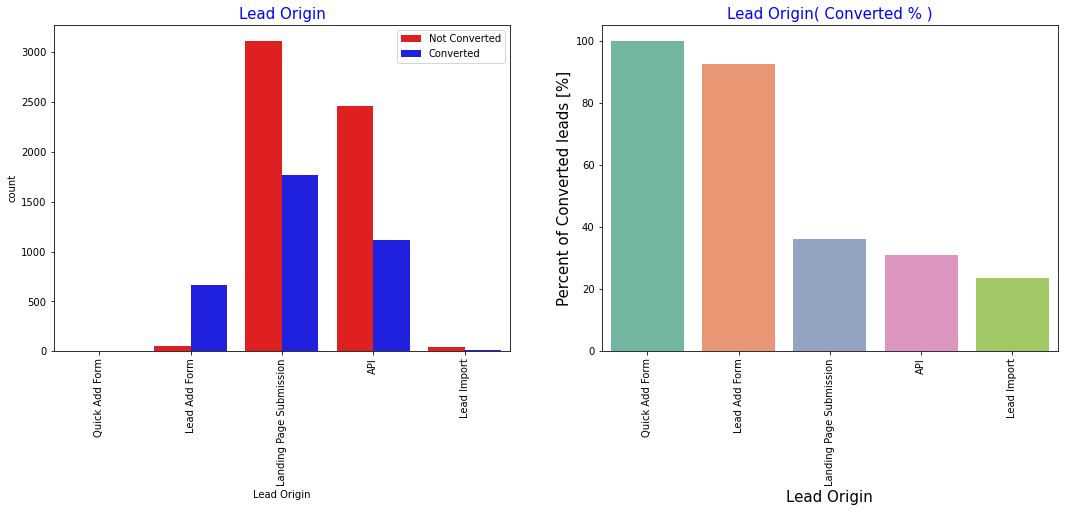

In [51]:
categorical_univariate("Lead Origin")

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -   Quick Add form and Lead Add Form has high conversion rate. But the total leads obtained through these  are very less compared to other.  
  -  Landing page submission and API have given more number of leads, the conversion rate is less than half but still some thing we can work with
  -  Lead import has less number of leads and also the less convertion rate
         
    </span>
</div>

#### Lead Source

          Lead Source  Total Leads   % Values
0              Google         2868  31.038961
1      Direct Traffic         2543  27.521645
2          Olark Chat         1755  18.993506
3      Organic Search         1154  12.489177
4           Reference          534   5.779221
5    Welingak Website          142   1.536797
6      Referral Sites          125   1.352814
7            Facebook           55   0.595238
8        Email Opened           36   0.389610
9                bing            6   0.064935
10             google            5   0.054113
11         Click2call            4   0.043290
12      Press_Release            2   0.021645
13       Social Media            2   0.021645
14          Live Chat            2   0.021645
15   welearnblog_Home            1   0.010823
16            testone            1   0.010823
17            WeLearn            1   0.010823
18     youtubechannel            1   0.010823
19  Pay per Click Ads            1   0.010823
20             NC_EDM            1

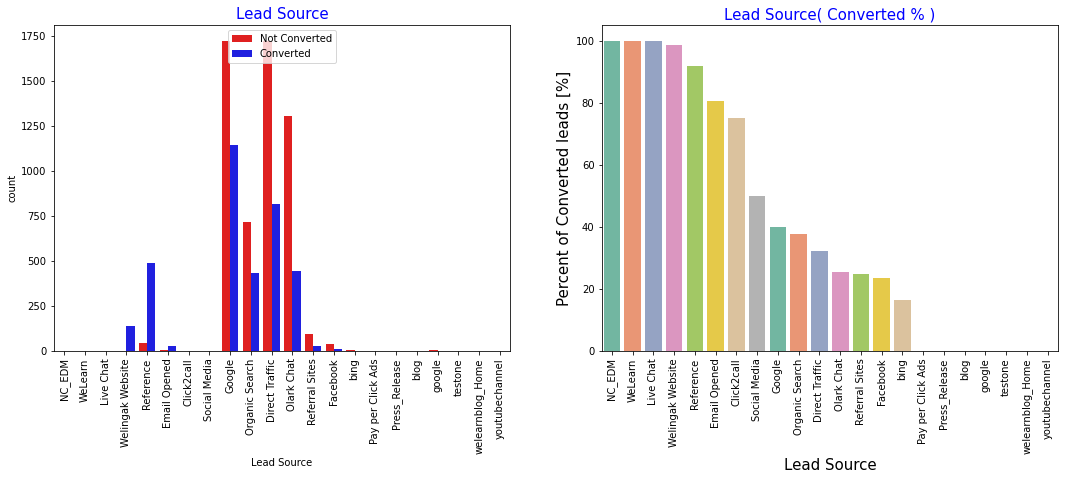

In [52]:
categorical_univariate("Lead Source")

<div class="alert alert-block alert-warning">
    <span>
      <b>Observation : </b><br>  
        
  -   We can observe Google repeated twice, and many elemnts with low frequency. let's do some prep on them
  -   Facebook is social media but it has more frequency than the social media. so will merge social media into Others
         
    </span>
</div>

In [53]:
# Let's add google into Google
data['Lead Source'].replace('google','Google', inplace = True)

data['Lead Source'].replace(['bing','Click2call','Live Chat','Social Media','Press_Release','NC_EDM',
                                                     'youtubechannel','welearnblog_Home','WeLearn','Pay per Click Ads',
                                                    'testone','blog',] ,'Others', inplace = True)  

        Lead Source  Total Leads   % Values
0            Google         2873  31.093074
1    Direct Traffic         2543  27.521645
2        Olark Chat         1755  18.993506
3    Organic Search         1154  12.489177
4         Reference          534   5.779221
5  Welingak Website          142   1.536797
6    Referral Sites          125   1.352814
7          Facebook           55   0.595238
8      Email Opened           36   0.389610
9            Others           23   0.248918


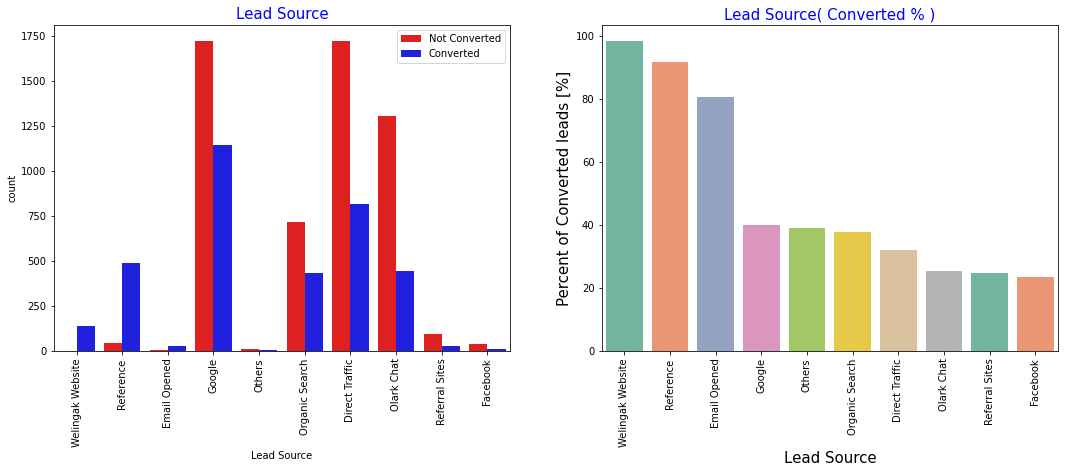

In [54]:
categorical_univariate("Lead Source")

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -  Google and Direct traffic are the two sources generaing high leads. Their lead conversion rate is near 40% levels.
  -  Welingak Website and Reference have have conversion rates but the leads are few, Should focus on the website more and More referrals from the existing users must be taken for more hot leads.
         
    </span>
</div>

#### Do Not Email

  Do Not Email  Total Leads   % Values
0           No         8506  92.056277
1          Yes          734   7.943723


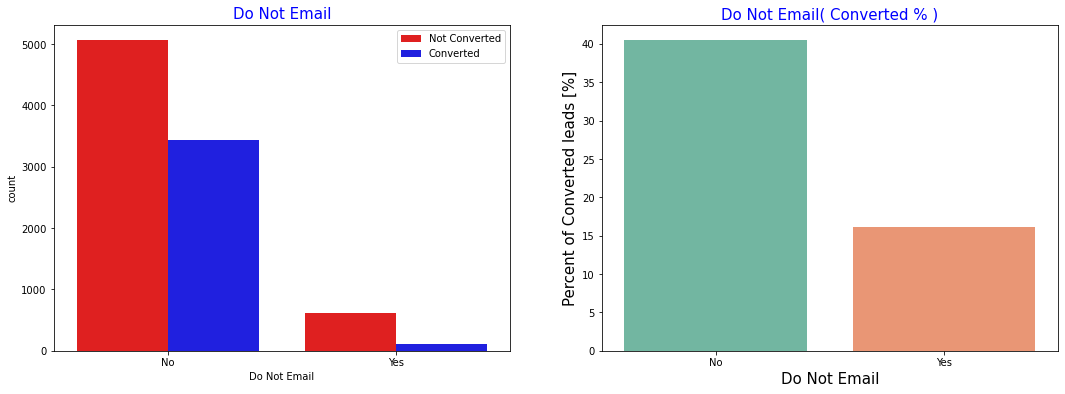

In [55]:
categorical_univariate("Do Not Email", label_rotation=False)

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -  Most of the leads are not willing to receive emails
  -  Nearly 40% of people who choose not to receive mail still converted.
  -  While there is onlt 15% conversion rate with those who opted to receive mail
         
    </span>
</div>

#### Do Not Call

  Do Not Call  Total Leads   % Values
0          No         9238  99.978355
1         Yes            2   0.021645


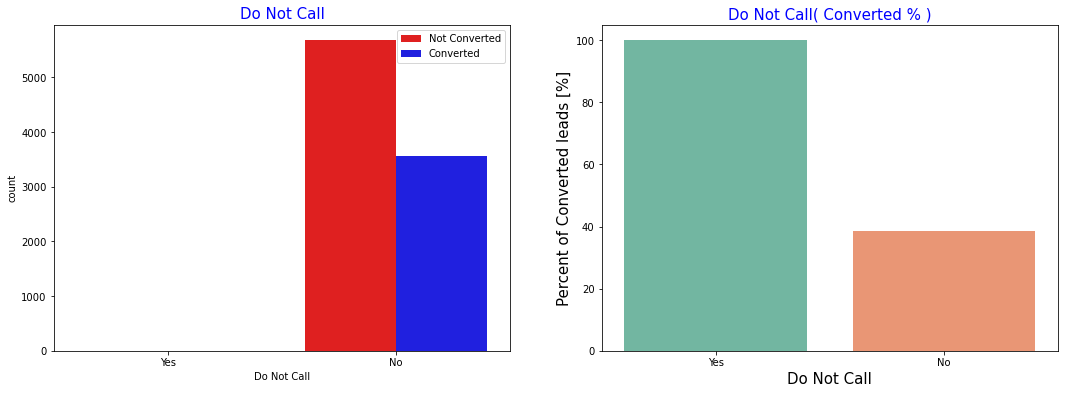

In [56]:
categorical_univariate("Do Not Call", label_rotation=False)

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -  The data looks highly skewed towards No for 'Do Not Call' and will not be helpful in analysis.
  -  Hence droping this column
         
    </span>
</div>

In [57]:
data.drop('Do Not Call',axis=1, inplace = True)

#### Last Activity

                   Last Activity  Total Leads   % Values
0                   Email Opened         3540  38.311688
1                       SMS Sent         2745  29.707792
2        Olark Chat Conversation          973  10.530303
3        Page Visited on Website          640   6.926407
4              Converted to Lead          428   4.632035
5                  Email Bounced          326   3.528139
6             Email Link Clicked          267   2.889610
7      Form Submitted on Website          116   1.255411
8                    Unreachable           93   1.006494
9                   Unsubscribed           61   0.660173
10      Had a Phone Conversation           30   0.324675
11            Approached upfront            9   0.097403
12  View in browser link Clicked            6   0.064935
13                Email Received            2   0.021645
14             Email Marked Spam            2   0.021645
15        Resubscribed to emails            1   0.010823
16    Visited Booth in Tradesho

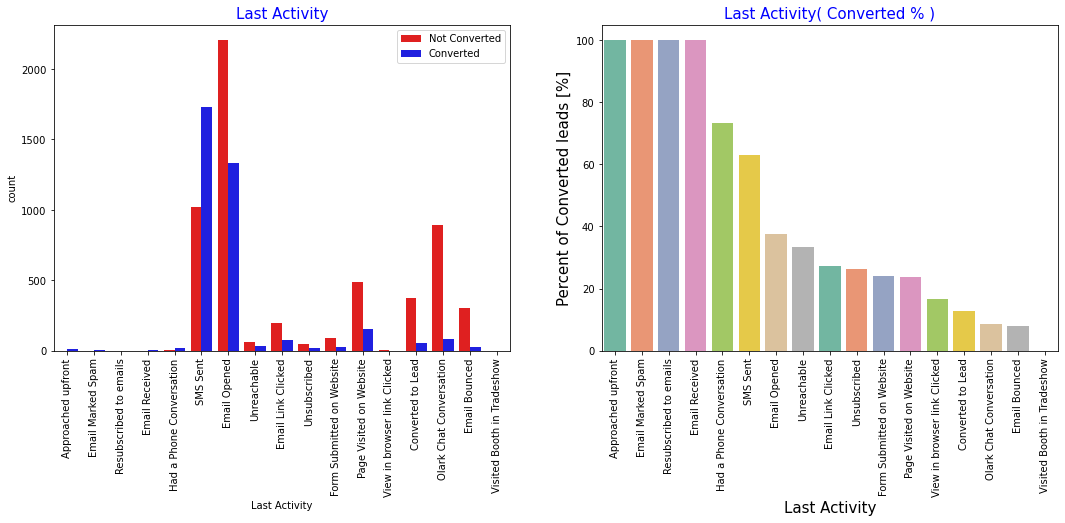

In [58]:
categorical_univariate("Last Activity")

In [59]:
# Replacing values with low frequency
data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other activities' , inplace =True)

                Last Activity  Total Leads   % Values
0                Email Opened         3540  38.311688
1                    SMS Sent         2745  29.707792
2     Olark Chat Conversation          973  10.530303
3     Page Visited on Website          640   6.926407
4           Converted to Lead          428   4.632035
5               Email Bounced          326   3.528139
6          Email Link Clicked          267   2.889610
7   Form Submitted on Website          116   1.255411
8                 Unreachable           93   1.006494
9                Unsubscribed           61   0.660173
10           Other activities           51   0.551948


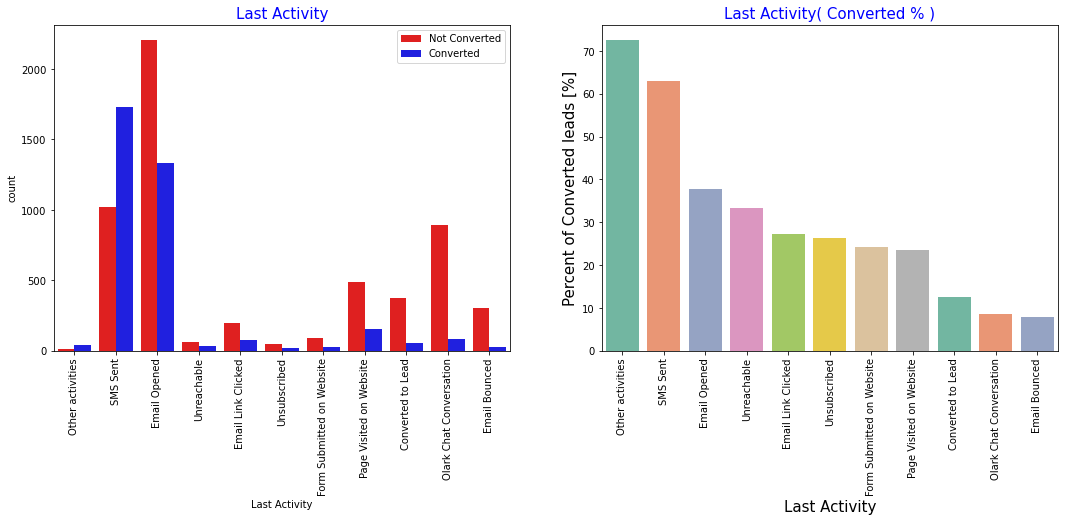

In [60]:
categorical_univariate("Last Activity")

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -  Other activities have a high conversion rate , but have only few frequency
  -  Emailed Opened has highest frequency of them all but has conversion rte near 40%
  -  SMS Sent is second most frequent , and has near 60% conversion rate
  -  Leads with email bounced have the least conversion rate
         
    </span>
</div>

#### Specialization

                       Specialization  Total Leads   % Values
0                              Others         3380  36.580087
1                  Finance Management          976  10.562771
2           Human Resource Management          848   9.177489
3                Marketing Management          838   9.069264
4               Operations Management          503   5.443723
5             Business Administration          403   4.361472
6              IT Projects Management          366   3.961039
7             Supply Chain Management          349   3.777056
8   Banking, Investment And Insurance          338   3.658009
9               Media and Advertising          203   2.196970
10                 Travel and Tourism          203   2.196970
11             International Business          178   1.926407
12              Healthcare Management          159   1.720779
13             Hospitality Management          114   1.233766
14                         E-COMMERCE          112   1.212121
15      

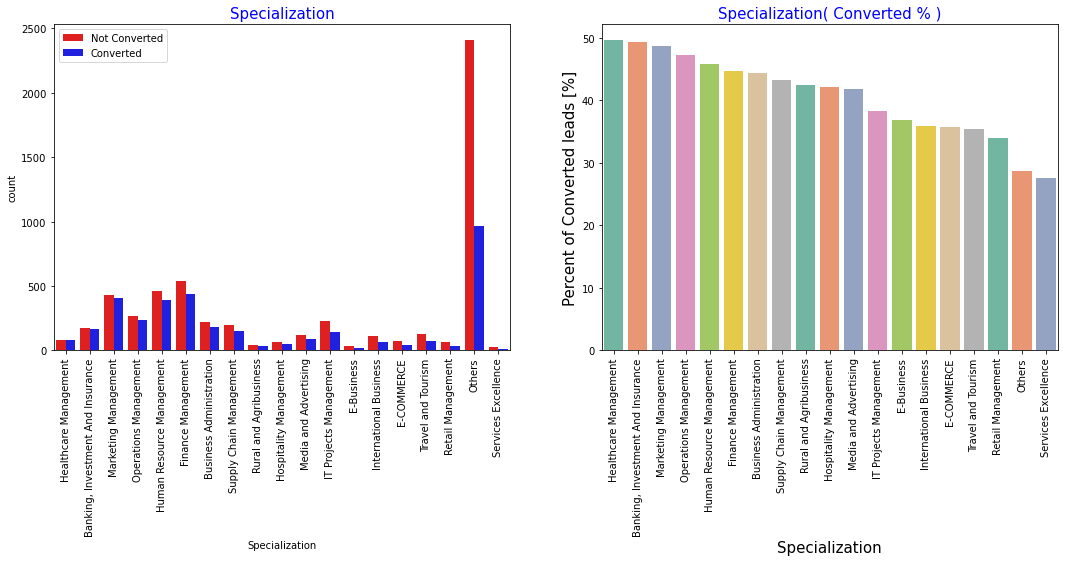

In [61]:
categorical_univariate("Specialization")

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -  leads with no specilisation are more frequent with 36% of the total leads. Out of these only near 30% of them have converted
  -  Service Excellence has low leads and low conversion rate
  -  Healthcare Management and Banking, Investment And Insurance have comparitively low leads but have high conversion rates
         
    </span>
</div>

#### Occupation

             Occupation  Total Leads   % Values
0            Unemployed         5600  60.606061
1         Not Available         2690  29.112554
2  Working Professional          706   7.640693
3               Student          210   2.272727
4                 Other           16   0.173160
5             Housewife           10   0.108225
6           Businessman            8   0.086580


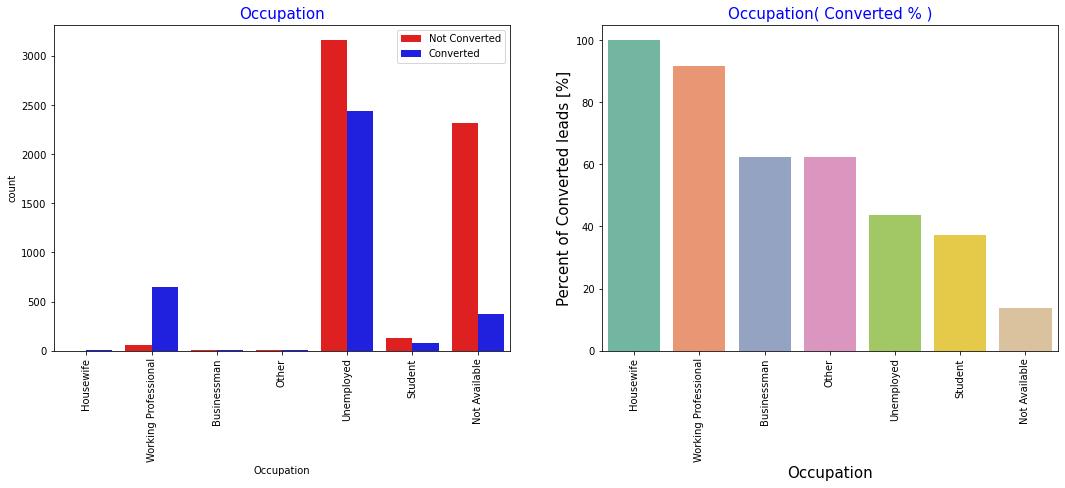

In [62]:
categorical_univariate("Occupation")

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -   House wife have near 100% conversion rate and working professionals near 90%, but low leads , they should be foucused more
  -   Unemployed has more leads but the conversion rate is below 50%
  -   leads who's occupation is not available are second most frequent , but their conversion rate is the least
         
    </span>
</div>

#### Search

  Search  Total Leads   % Values
0     No         9226  99.848485
1    Yes           14   0.151515


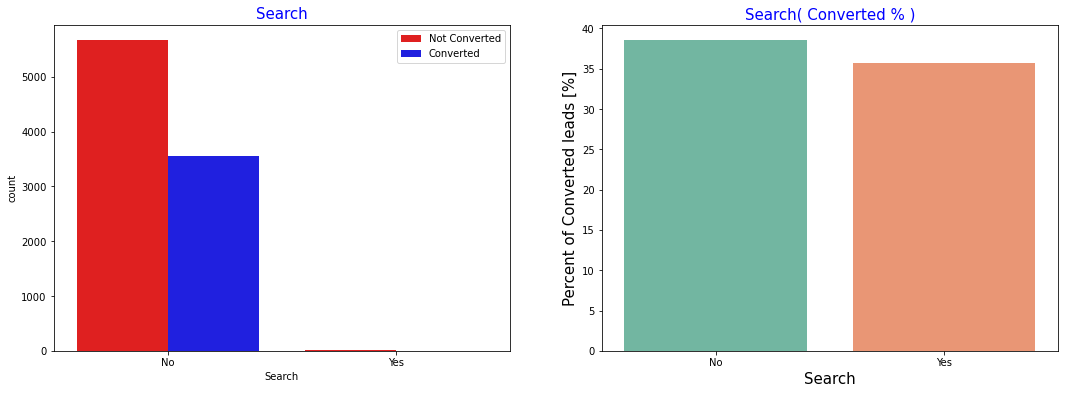

In [63]:
categorical_univariate("Search", label_rotation=False)

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
   -  Data is skewed and we see no value for it in the model hence dropping the column

    </span>
</div>

In [64]:
data.drop('Search' , axis =1, inplace = True)

#### Newspaper Article

  Newspaper Article  Total Leads   % Values
0                No         9238  99.978355
1               Yes            2   0.021645


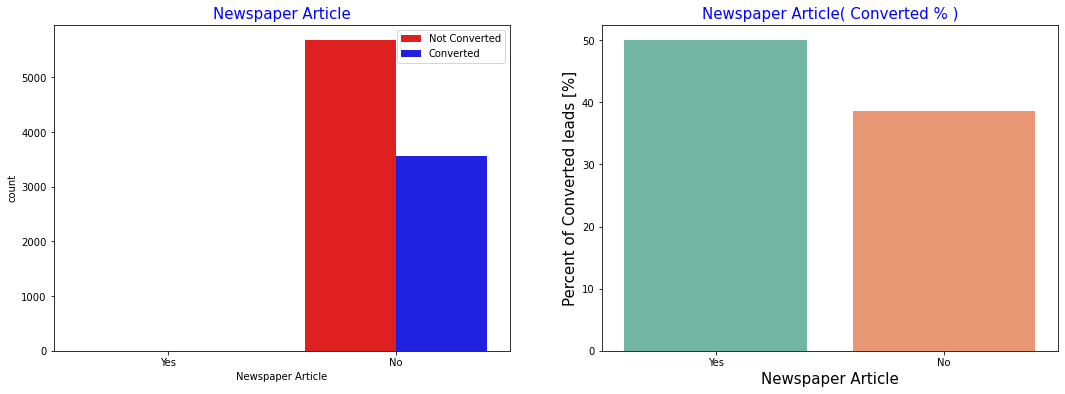

In [65]:
categorical_univariate("Newspaper Article", label_rotation=False)

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -  Data is skewed and we see no value for it in the model hence dropping the column
   
    </span>
</div>

In [66]:
data.drop('Newspaper Article' , axis =1, inplace = True)

#### Digital Advertisement

  Digital Advertisement  Total Leads  % Values
0                    No         9236  99.95671
1                   Yes            4   0.04329


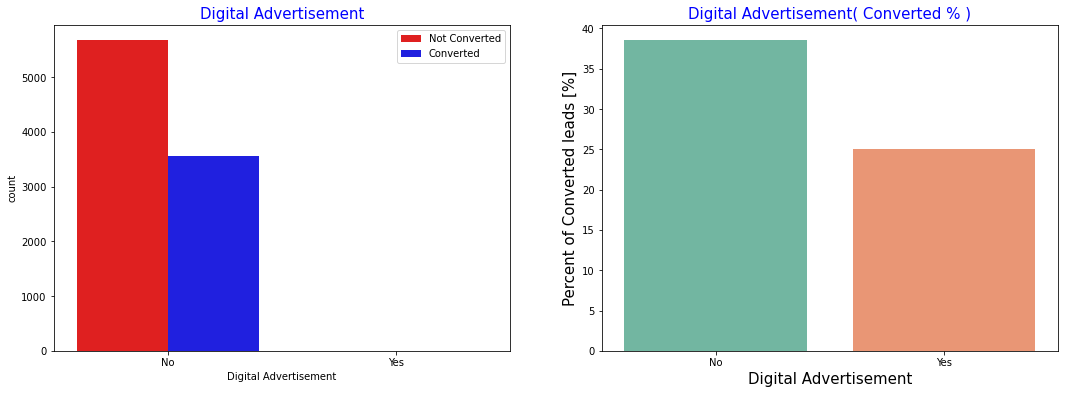

In [67]:
categorical_univariate("Digital Advertisement", label_rotation=False)

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -   Data is skewed and we see no value for it in the model hence dropping the column    
       
    </span>
</div>

In [68]:
data.drop('Digital Advertisement' , axis =1, inplace = True)

#### X Education Forums

  X Education Forums  Total Leads   % Values
0                 No         9239  99.989177
1                Yes            1   0.010823


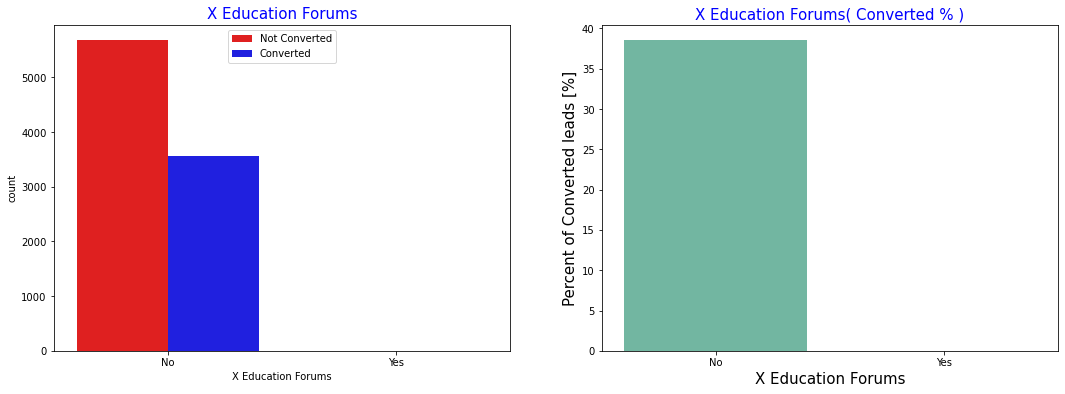

In [69]:
categorical_univariate("X Education Forums", label_rotation=False)

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -   Data is skewed and we see no value for it in the model hence dropping the column    
       
    </span>
</div>

In [70]:
data.drop('X Education Forums' , axis =1, inplace = True)

#### Newspaper

  Newspaper  Total Leads   % Values
0        No         9239  99.989177
1       Yes            1   0.010823


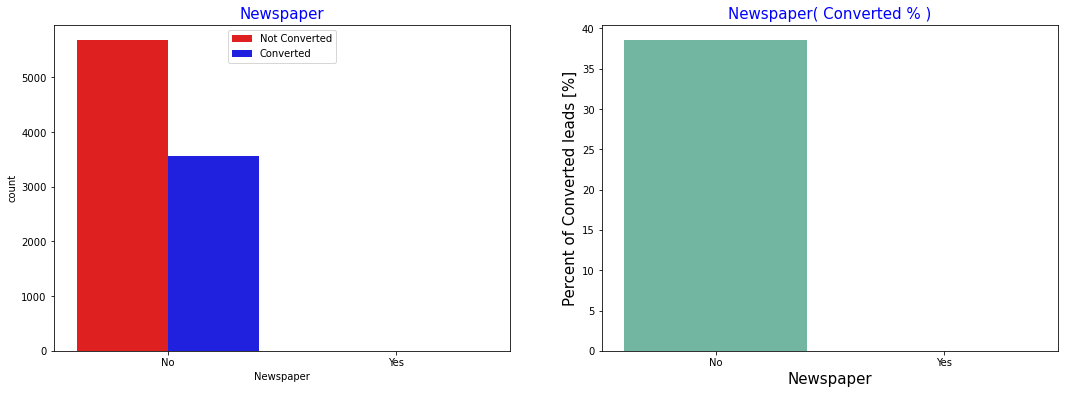

In [71]:
categorical_univariate("Newspaper", label_rotation=False)

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -   Data is skewed and we see no value for it in the model hence dropping the column    
       
    </span>
</div>

In [72]:
data.drop('Newspaper' , axis =1, inplace = True)

#### Recommendation

  Recommendation  Total Leads   % Values
0             No         9233  99.924242
1            Yes            7   0.075758


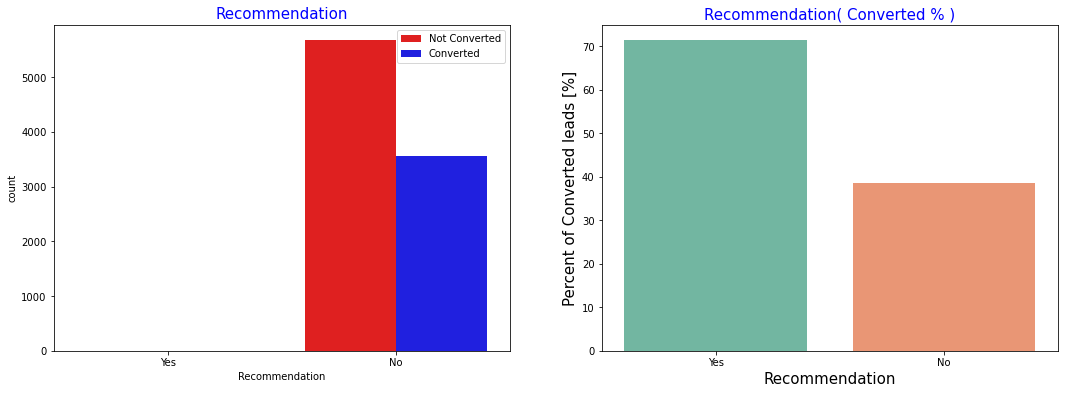

In [73]:
categorical_univariate("Recommendation", label_rotation=False)

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -  Data is skewed and we see no value for it in the model hence dropping the column  
         
    </span>
</div>

In [74]:
data.drop('Recommendation' , axis =1, inplace = True)

#### Free Book

  Free Book  Total Leads   % Values
0        No         6352  68.744589
1       Yes         2888  31.255411


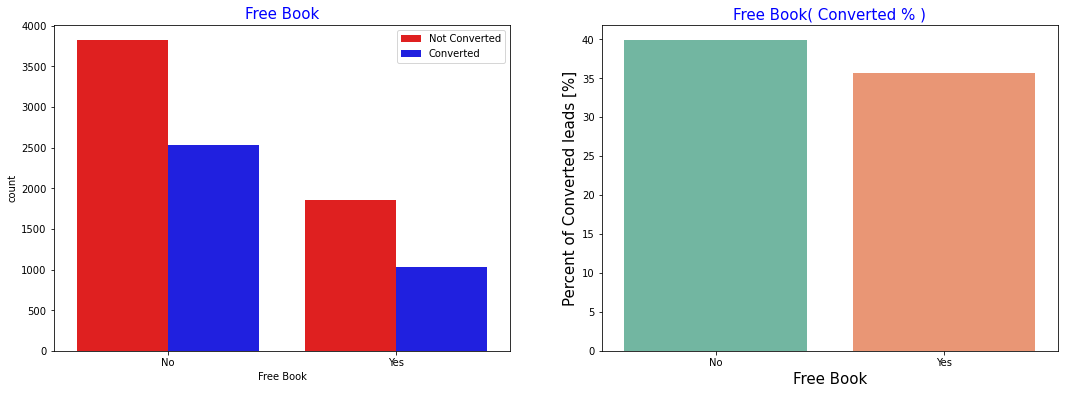

In [75]:
categorical_univariate("Free Book", label_rotation=False)

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -   The conversion rate in tho who are given a free copy has not changed much, hence there is no value from it to model hence droping it.  
         
    </span>
</div>

In [76]:
data.drop('Free Book' , axis =1, inplace = True)

### 4.3 Bivariate Analysis

<Figure size 1440x1440 with 0 Axes>

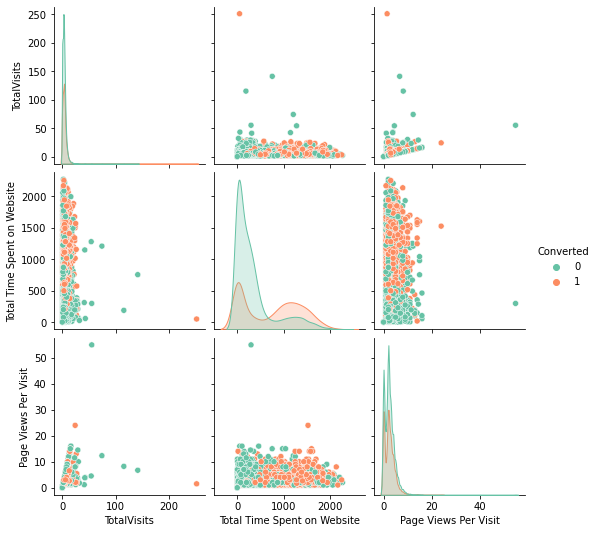

In [77]:
plt.figure(figsize =[20,20])
sns.pairplot(data,hue="Converted",kind='scatter')                                  
plt.show()

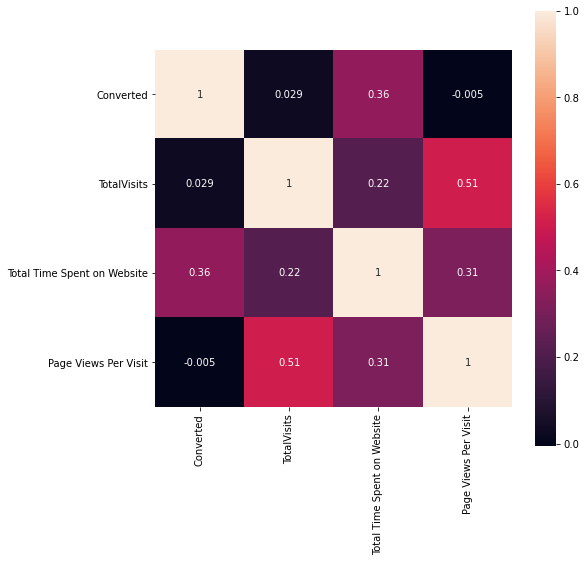

In [78]:
corr_mat = data.corr().round(3)
plt.figure(figsize=[8,8])
sns.heatmap(data=corr_mat,square=True,annot=True,cbar=True)
plt.show()

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -   Numerical columns have outliers and need outlier treatment , There is also a presence of normal distribution relation ship between features
         
    </span>
</div>

### Step 5 Data Preparation

 #### Step 5.1 Outliers Treatment

As we have seen before the data has outliers
The data already suggests a normal distribution and no signs of exponential factors

So We will go with capping the outlier values

We also saw that outliers lie on the hiher end so single side capping would be enough

In [79]:
data[["TotalVisits","Page Views Per Visit"]].describe(percentiles=[.90,.93,.95,.99])

,TotalVisits,Page Views Per Visit
count,9240.000000,9240.000000
mean,3.438636,2.357440
std,4.819024,2.145781
min,0.000000,0.000000
50%,3.000000,2.000000
90%,7.000000,5.000000
93%,8.000000,5.000000
95%,10.000000,6.000000
99%,17.000000,9.000000
max,251.000000,55.000000


In [80]:
# lets see how many rows effeft for each percentile
v_99 = data['TotalVisits'].quantile(0.99)
v_97 = data['TotalVisits'].quantile(0.97)
v_95 = data['TotalVisits'].quantile(0.95)
v_93 = data['TotalVisits'].quantile(0.93)
print( "\n for TotalVisits" )
print("Total number of rows getting capped for 99 percentile : ",len(data[data['TotalVisits'] >= v_99]))
print("Total number of rows getting capped for 97 percentile : ",len(data[data['TotalVisits'] >= v_97]))
print("Total number of rows getting capped for 95 percentile : ",len(data[data['TotalVisits'] >= v_95]))
print("Total number of rows getting capped for 93 percentile : ",len(data[data['TotalVisits'] >= v_93]))

Pv_99 = data['Page Views Per Visit'].quantile(0.99)
Pv_97 = data['Page Views Per Visit'].quantile(0.97)
Pv_95 = data['Page Views Per Visit'].quantile(0.95)
Pv_93 = data['Page Views Per Visit'].quantile(0.93)
print( "\n for Page Views Per Visit" )
print("Total number of rows getting capped for 99 percentile : ",len(data[data['Page Views Per Visit'] >= Pv_99]))
print("Total number of rows getting capped for 97 percentile : ",len(data[data['Page Views Per Visit'] >= Pv_97]))
print("Total number of rows getting capped for 95 percentile : ",len(data[data['Page Views Per Visit'] >= Pv_95]))
print("Total number of rows getting capped for 93 percentile : ",len(data[data['Page Views Per Visit'] >= Pv_93]))



 for TotalVisits
Total number of rows getting capped for 99 percentile :  99
Total number of rows getting capped for 97 percentile :  353
Total number of rows getting capped for 95 percentile :  467
Total number of rows getting capped for 93 percentile :  855

 for Page Views Per Visit
Total number of rows getting capped for 99 percentile :  120
Total number of rows getting capped for 97 percentile :  344
Total number of rows getting capped for 95 percentile :  604
Total number of rows getting capped for 93 percentile :  1151


As seen above to make minimal changes on data and to cap the outliers we will choose 95 percentile

In [81]:
#Capping the data at 95% percetile value
Q4 = data['TotalVisits'].quantile(0.95)
data.loc[data['TotalVisits'] >= Q4, 'TotalVisits'] = Q4

Q4 = data['Page Views Per Visit'].quantile(0.95)
data.loc[data['Page Views Per Visit'] >= Q4, 'Page Views Per Visit'] = Q4

Let's run the multivariate analysis again to see the changes

<Figure size 1440x1440 with 0 Axes>

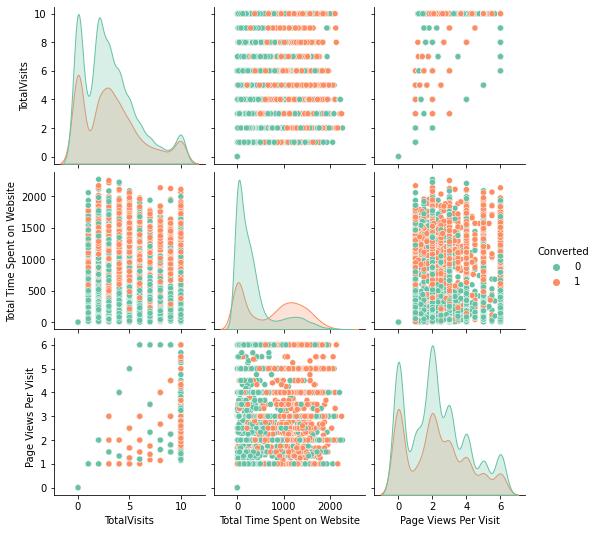

In [82]:
plt.figure(figsize =[20,20])
sns.pairplot(data,hue="Converted",kind='scatter')                                  
plt.show()

### 5.2 Dummy variable creation

In [83]:
# Checking the unique value counts for categorcial columns
data.nunique().sort_values()

Do Not Email                      2
Converted                         2
Lead Origin                       5
Occupation                        7
Lead Source                      10
TotalVisits                      11
Last Activity                    11
Specialization                   19
Page Views Per Visit             91
Total Time Spent on Website    1731
dtype: int64

In [84]:
# Creating a dummy variable for some of the categorical variables 
dummy1 = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Occupation', 'Last Activity', 'Specialization']])

Instead of droping the first one or last one randomly and loose important data, let's drop them after eavluationg
 - to drop "Quick Add Form" as it has only one lead.
 - to drop "Lead Source_Others" as it has less leads and the conersion rate is formed due to amalgamation of single leads's conversion rate
 - to drop "Occupation_Businessman" due to it's low leads
 - to drop "Last Activity_Other Activity" as it has less leads and the conersion rate is formed due to amalgamation of single leads's conversion rate
 - to drop "Specialization_Services Excellence" as it has loew leads and low conversion rate


In [85]:
dummy1.drop(['Lead Origin_Quick Add Form', 'Lead Source_Others', 'Occupation_Businessman', 'Last Activity_Other activities', 'Specialization_Services Excellence'], axis=1)

# Adding the results to the master dataframe
data = pd.concat([data, dummy1], axis=1)

data.drop(['Lead Origin', 'Lead Source', 'Occupation', 'Last Activity', 'Specialization'], axis=1 , inplace = True)

In [86]:
data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Email Opened,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Occupation_Businessman,Occupation_Housewife,Occupation_Not Available,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,No,0,0.0,0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,No,0,5.0,674,2.5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,No,1,2.0,1532,2.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,No,0,1.0,305,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,No,1,2.0,1428,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 57 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      9240 non-null   object 
 1   Converted                                         9240 non-null   int64  
 2   TotalVisits                                       9240 non-null   float64
 3   Total Time Spent on Website                       9240 non-null   int64  
 4   Page Views Per Visit                              9240 non-null   float64
 5   Lead Origin_API                                   9240 non-null   uint8  
 6   Lead Origin_Landing Page Submission               9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                         9240 non-null   uint8  
 8   Lead Origin_Lead Import                           9240 non-null   uint8  
 9   Lead Origin_Quick A

#### 5.3 To convert the values of binary categorical into 0's and 1's

In [88]:
data[['Do Not Email']] = data[['Do Not Email']].apply(lambda x: x.map({'Yes': 1, "No": 0}))
# rechecking the categorical values for 'Do Not Email' feature
data['Do Not Email'].value_counts()

0    8506
1     734
Name: Do Not Email, dtype: int64

#### 5.4  Looking at Correlations

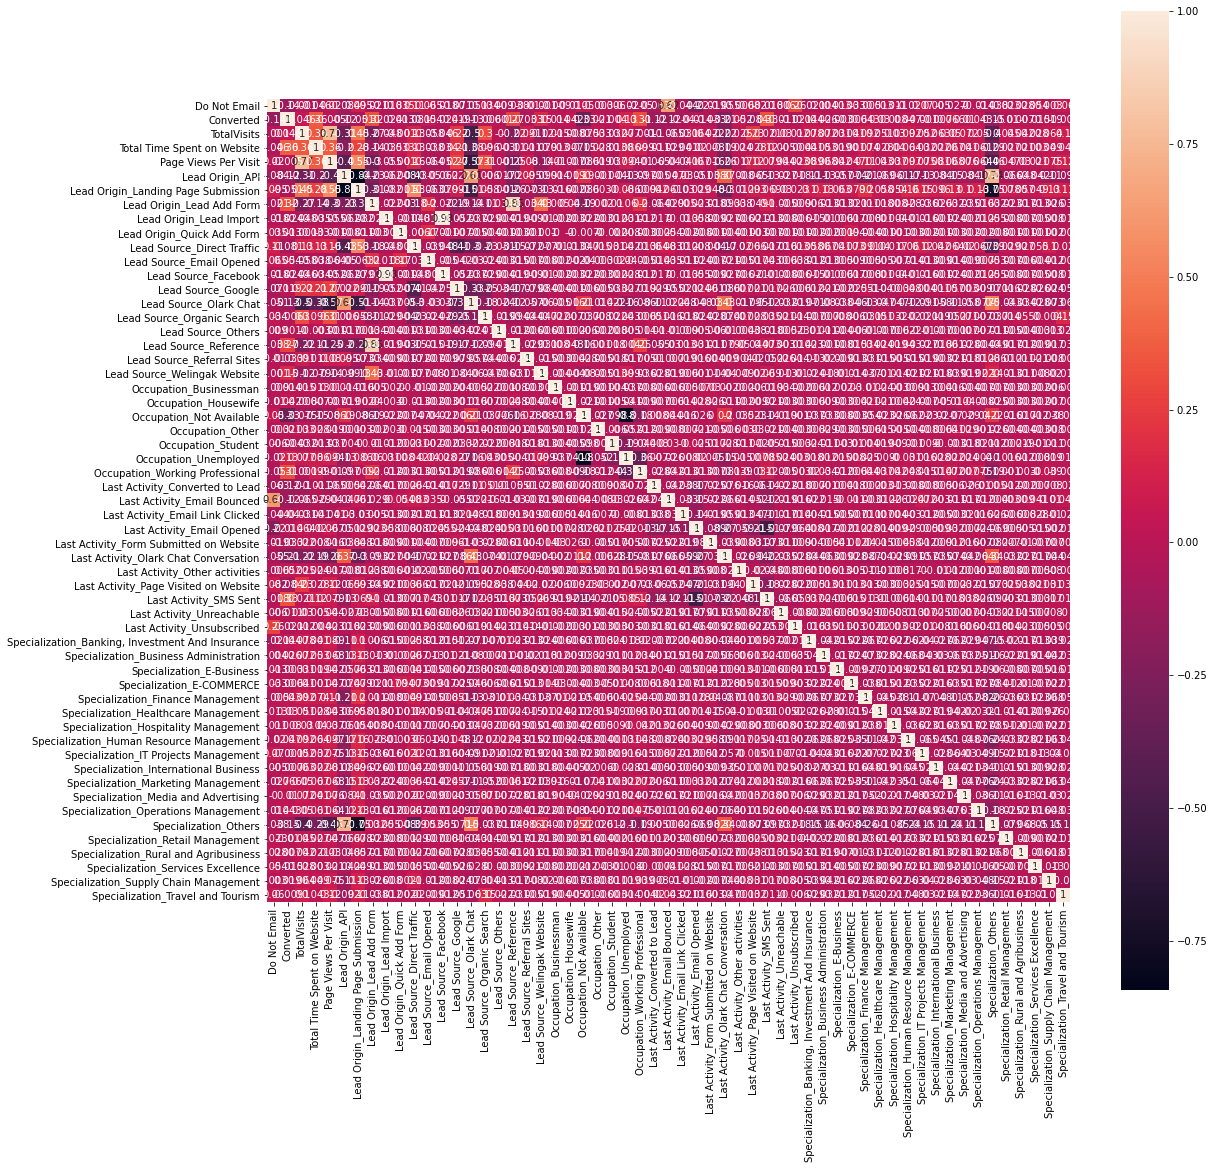

In [89]:
corr_mat = data.corr().round(3)
plt.figure(figsize=[18,18])
sns.heatmap(data=corr_mat,square=True,annot=True,cbar=True)
plt.show()

To get top 10 correlations 

1. create correlation matrix, apply absolute function to get absolute value so that a top 'n' can be fetched
2. Take either upper triangle or lower triangle from that matrix
3. un stack it, you will get three columns 
4. Sort it in

In [90]:
correlation_matrix_abs = data.corr().abs()
correlation_data = correlation_matrix_abs.where(np.triu(np.ones(correlation_matrix_abs.shape),k=1).astype(np.bool)).unstack().sort_values(ascending=False).dropna()
correlation_data[0:10]

Lead Source_Facebook                 Lead Origin_Lead Import                0.981709
Lead Source_Reference                Lead Origin_Lead Add Form              0.853237
Lead Origin_Landing Page Submission  Lead Origin_API                        0.842492
Occupation_Unemployed                Occupation_Not Available               0.794875
Page Views Per Visit                 TotalVisits                            0.767585
Specialization_Others                Lead Origin_Landing Page Submission    0.748263
                                     Lead Origin_API                        0.740470
Last Activity_Email Bounced          Do Not Email                           0.618470
Lead Source_Olark Chat               Lead Origin_API                        0.607716
                                     Page Views Per Visit                   0.573334
dtype: float64

### 5.5: Test-Train Split

In [91]:
# Creating feature variable as X
X = data.drop(['Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Email Opened,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Occupation_Businessman,Occupation_Housewife,Occupation_Not Available,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,5.0,674,2.5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,2.0,1532,2.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [92]:
# Creating response variable as y
y = data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [93]:
# Splitting the dataset into train and test
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### 5.6 Feature Scaling

In [94]:
X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Email Opened,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Occupation_Businessman,Occupation_Housewife,Occupation_Not Available,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,0.078386,3.172851,483.875850,2.245530,0.387137,0.528139,0.079468,0.005102,0.000155,0.271490,0.004174,0.005102,0.316636,0.190167,0.121058,0.002783,0.060297,0.014224,0.014069,0.000928,0.001391,0.292672,0.001237,0.021027,0.605133,0.077613,0.046073,0.036333,0.028293,0.381262,0.012678,0.102195,0.005875,0.072047,0.300402,0.008813,0.006030,0.035096,0.043599,0.005720,0.012987,0.105442,0.015615,0.013451,0.091682,0.037260,0.018707,0.093383,0.020563,0.057205,0.367502,0.010823,0.007267,0.004793,0.037570,0.021336
std,0.268799,2.759937,546.565663,1.772912,0.487133,0.499246,0.270489,0.071252,0.012434,0.444763,0.064480,0.071252,0.465200,0.392463,0.326219,0.052684,0.238054,0.118422,0.117786,0.030445,0.037279,0.455024,0.035150,0.143484,0.488860,0.267582,0.209659,0.187131,0.165822,0.485734,0.111888,0.302929,0.076429,0.258586,0.458468,0.093468,0.077423,0.184036,0.204218,0.075423,0.113227,0.307146,0.123991,0.115204,0.288599,0.189414,0.135500,0.290991,0.141926,0.232251,0.482162,0.103475,0.084940,0.069069,0.190168,0.144512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [95]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Email Opened,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Occupation_Businessman,Occupation_Housewife,Occupation_Not Available,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
count,6468.000000,6.468000e+03,6.468000e+03,6.468000e+03,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,0.078386,-6.206813e-17,-1.609377e-16,-9.142003e-17,0.387137,0.528139,0.079468,0.005102,0.000155,0.271490,0.004174,0.005102,0.316636,0.190167,0.121058,0.002783,0.060297,0.014224,0.014069,0.000928,0.001391,0.292672,0.001237,0.021027,0.605133,0.077613,0.046073,0.036333,0.028293,0.381262,0.012678,0.102195,0.005875,0.072047,0.300402,0.008813,0.006030,0.035096,0.043599,0.005720,0.012987,0.105442,0.015615,0.013451,0.091682,0.037260,0.018707,0.093383,0.020563,0.057205,0.367502,0.010823,0.007267,0.004793,0.037570,0.021336
std,0.268799,1.000077e+00,1.000077e+00,1.000077e+00,0.487133,0.499246,0.270489,0.071252,0.012434,0.444763,0.064480,0.071252,0.465200,0.392463,0.326219,0.052684,0.238054,0.118422,0.117786,0.030445,0.037279,0.455024,0.035150,0.143484,0.488860,0.267582,0.209659,0.187131,0.165822,0.485734,0.111888,0.302929,0.076429,0.258586,0.458468,0.093468,0.077423,0.184036,0.204218,0.075423,0.113227,0.307146,0.123991,0.115204,0.288599,0.189414,0.135500,0.290991,0.141926,0.232251,0.482162,0.103475,0.084940,0.069069,0.190168,0.144512
min,0.000000,-1.149699e+00,-8.853708e-01,-1.266675e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-7.873438e-01,-8.634138e-01,-7.025878e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

###  Step 6:  Model Building

#### 6.1 Feature selection (reduction) using RFE

In [96]:
#To select top 2o features
logreg = LogisticRegression()
rfe = RFE(logreg, 20)           
rfe = rfe.fit(X_train, y_train)

In [97]:
rfe.support_

array([ True, False,  True, False, False,  True,  True, False, False,
        True, False,  True,  True, False,  True, False, False,  True,
        True, False,  True,  True, False, False, False,  True,  True,
        True, False, False, False,  True,  True, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False])

In [98]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Lead Origin_API', False, 26),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Origin_Quick Add Form', False, 32),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Email Opened', False, 18),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', False, 8),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Others', False, 30),
 ('Lead Source_Reference', False, 17),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Occupation_Businessman', False, 16),
 ('Occupation_Housewife', True, 1),
 ('Occupation_Not Available', True, 1),
 ('Occupation_Other', False, 13),
 ('Occupation_Student', False, 15),
 ('Occupation_Unemployed', False, 14),
 ('Occupation_Working Profession

In [99]:
print('List of columns that are selected : ', X_train.columns[rfe.support_])
print('List of columns that are to be dropped : ',X_train.columns[~rfe.support_])

List of columns that are selected :  Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Occupation_Housewife', 'Occupation_Not Available',
       'Occupation_Working Professional', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other activities', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others'],
      dtype='object')
List of columns that are to be dropped :  Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_API',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Email Opened', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'Lead 

In [100]:
features = X_train.columns[rfe.support_].to_list()

#### 6.2 Building first model

In [101]:
# making functions to remove redundency in code

def logistic_model_stats(X_train,y_train):
    X_train_lm = sm.add_constant(X_train) # Adding constant 
    logistic_reg = sm.GLM(y_train,X_train_lm, family = sm.families.Binomial())
    lrm = logistic_reg.fit()
    print(lrm.summary())
    return lrm.params

def checking_vif(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)


In [102]:
logistic_model_stats(X_train[features],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.6
Date:                Mon, 21 Feb 2022   Deviance:                       5203.1
Time:                        09:05:39   Pearson chi2:                 8.02e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

const                                     0.893948
Do Not Email                             -1.108427
Total Time Spent on Website               1.056733
Lead Origin_Landing Page Submission      -0.927503
Lead Origin_Lead Add Form                 1.721961
Lead Source_Direct Traffic               -1.298888
Lead Source_Facebook                     -1.668820
Lead Source_Google                       -0.998520
Lead Source_Organic Search               -1.140791
Lead Source_Referral Sites               -1.170004
Lead Source_Welingak Website              2.408341
Occupation_Housewife                     22.685089
Occupation_Not Available                 -1.100031
Occupation_Working Professional           2.433623
Last Activity_Converted to Lead          -1.165366
Last Activity_Email Bounced              -0.830952
Last Activity_Olark Chat Conversation    -1.246954
Last Activity_Other activities            1.582936
Last Activity_SMS Sent                    1.236439
Specialization_Hospitality Mana

In [103]:
checking_vif(X_train[features])

                                 Features   VIF
2     Lead Origin_Landing Page Submission  6.24
4              Lead Source_Direct Traffic  4.13
6                      Lead Source_Google  3.14
19                  Specialization_Others  2.64
7              Lead Source_Organic Search  1.87
0                            Do Not Email  1.85
14            Last Activity_Email Bounced  1.78
17                 Last Activity_SMS Sent  1.61
11               Occupation_Not Available  1.60
3               Lead Origin_Lead Add Form  1.47
15  Last Activity_Olark Chat Conversation  1.39
9            Lead Source_Welingak Website  1.27
1             Total Time Spent on Website  1.26
12        Occupation_Working Professional  1.20
13        Last Activity_Converted to Lead  1.12
8              Lead Source_Referral Sites  1.07
5                    Lead Source_Facebook  1.02
16         Last Activity_Other activities  1.02
18  Specialization_Hospitality Management  1.02
10                   Occupation_Housewif

#### 6.3 Manual Feature Reduction

In Manual Feature Reduction, we wil reduce the features until we reach reasonable amount of feature count and maintain Sensitivity of the modeal =>80%

The features will removed in the order of 

  -  High P-Value &  High VIF
  -  High P-Value
  -  High VIF
  -  High negative GLM coeeficient

### Model 2

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -   Dropping "Occupation_Housewife" due to high P-value of 0.999
         
    </span>
</div>

In [104]:
features.remove('Occupation_Housewife')

In [105]:
logistic_model_stats(X_train[features],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.6
Date:                Mon, 21 Feb 2022   Deviance:                       5215.2
Time:                        09:05:40   Pearson chi2:                 8.04e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

const                                    0.900103
Do Not Email                            -1.112440
Total Time Spent on Website              1.055780
Lead Origin_Landing Page Submission     -0.920649
Lead Origin_Lead Add Form                1.736750
Lead Source_Direct Traffic              -1.303295
Lead Source_Facebook                    -1.669547
Lead Source_Google                      -0.997853
Lead Source_Organic Search              -1.136641
Lead Source_Referral Sites              -1.172037
Lead Source_Welingak Website             2.393982
Occupation_Not Available                -1.103839
Occupation_Working Professional          2.426552
Last Activity_Converted to Lead         -1.172367
Last Activity_Email Bounced             -0.835605
Last Activity_Olark Chat Conversation   -1.250412
Last Activity_Other activities           1.574786
Last Activity_SMS Sent                   1.228226
Specialization_Hospitality Management   -0.923890
Specialization_Others                   -0.935159


In [106]:
checking_vif(X_train[features])

                                 Features   VIF
2     Lead Origin_Landing Page Submission  6.24
4              Lead Source_Direct Traffic  4.13
6                      Lead Source_Google  3.14
18                  Specialization_Others  2.64
7              Lead Source_Organic Search  1.87
0                            Do Not Email  1.85
13            Last Activity_Email Bounced  1.78
16                 Last Activity_SMS Sent  1.61
10               Occupation_Not Available  1.60
3               Lead Origin_Lead Add Form  1.46
14  Last Activity_Olark Chat Conversation  1.39
9            Lead Source_Welingak Website  1.27
1             Total Time Spent on Website  1.26
11        Occupation_Working Professional  1.19
12        Last Activity_Converted to Lead  1.12
8              Lead Source_Referral Sites  1.07
5                    Lead Source_Facebook  1.02
15         Last Activity_Other activities  1.02
17  Specialization_Hospitality Management  1.02


### Model 3

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -   Dropping "Lead Origin_Landing Page Submission" due to high VIF value
         
    </span>
</div>

In [107]:
features.remove('Lead Origin_Landing Page Submission')

In [108]:
logistic_model_stats(X_train[features],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2631.5
Date:                Mon, 21 Feb 2022   Deviance:                       5262.9
Time:                        09:05:40   Pearson chi2:                 7.73e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

const                                    0.446869
Do Not Email                            -1.136261
Total Time Spent on Website              1.068127
Lead Origin_Lead Add Form                1.957948
Lead Source_Direct Traffic              -1.752844
Lead Source_Facebook                    -1.633645
Lead Source_Google                      -1.273540
Lead Source_Organic Search              -1.421553
Lead Source_Referral Sites              -1.289738
Lead Source_Welingak Website             2.115776
Occupation_Not Available                -1.135586
Occupation_Working Professional          2.478949
Last Activity_Converted to Lead         -1.173614
Last Activity_Email Bounced             -0.873601
Last Activity_Olark Chat Conversation   -1.207256
Last Activity_Other activities           1.570401
Last Activity_SMS Sent                   1.192751
Specialization_Hospitality Management   -0.893999
Specialization_Others                   -0.365990
dtype: float64

In [109]:
checking_vif(X_train[features])

                                 Features   VIF
17                  Specialization_Others  1.90
0                            Do Not Email  1.85
12            Last Activity_Email Bounced  1.78
15                 Last Activity_SMS Sent  1.57
9                Occupation_Not Available  1.56
5                      Lead Source_Google  1.48
2               Lead Origin_Lead Add Form  1.45
3              Lead Source_Direct Traffic  1.39
13  Last Activity_Olark Chat Conversation  1.37
8            Lead Source_Welingak Website  1.26
1             Total Time Spent on Website  1.23
6              Lead Source_Organic Search  1.20
10        Occupation_Working Professional  1.19
11        Last Activity_Converted to Lead  1.12
7              Lead Source_Referral Sites  1.04
14         Last Activity_Other activities  1.02
16  Specialization_Hospitality Management  1.02
4                    Lead Source_Facebook  1.01


### Model 4

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -   Dropping "Last Activity_Email Bounced" due to high P-value
         
    </span>
</div>

In [110]:
features.remove('Last Activity_Email Bounced')

In [111]:
logistic_model_stats(X_train[features],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2634.8
Date:                Mon, 21 Feb 2022   Deviance:                       5269.6
Time:                        09:05:41   Pearson chi2:                 7.71e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

const                                    0.438493
Do Not Email                            -1.397686
Total Time Spent on Website              1.064864
Lead Origin_Lead Add Form                1.953768
Lead Source_Direct Traffic              -1.754086
Lead Source_Facebook                    -1.626988
Lead Source_Google                      -1.272698
Lead Source_Organic Search              -1.420232
Lead Source_Referral Sites              -1.284260
Lead Source_Welingak Website             2.109074
Occupation_Not Available                -1.134248
Occupation_Working Professional          2.474055
Last Activity_Converted to Lead         -1.160257
Last Activity_Olark Chat Conversation   -1.190447
Last Activity_Other activities           1.599604
Last Activity_SMS Sent                   1.219005
Specialization_Hospitality Management   -0.902912
Specialization_Others                   -0.375725
dtype: float64

In [112]:
checking_vif(X_train[features])

                                 Features   VIF
16                  Specialization_Others  1.89
9                Occupation_Not Available  1.56
14                 Last Activity_SMS Sent  1.54
5                      Lead Source_Google  1.48
2               Lead Origin_Lead Add Form  1.45
3              Lead Source_Direct Traffic  1.38
12  Last Activity_Olark Chat Conversation  1.36
8            Lead Source_Welingak Website  1.26
1             Total Time Spent on Website  1.23
6              Lead Source_Organic Search  1.20
10        Occupation_Working Professional  1.19
11        Last Activity_Converted to Lead  1.12
0                            Do Not Email  1.12
7              Lead Source_Referral Sites  1.04
13         Last Activity_Other activities  1.02
15  Specialization_Hospitality Management  1.02
4                    Lead Source_Facebook  1.01


### Model 5

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -   Dropping "Lead Source_Welingak Website" due to high P-value
         
    </span>
</div>

In [113]:
features.remove('Lead Source_Welingak Website')

In [114]:
logistic_model_stats(X_train[features],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2641.8
Date:                Mon, 21 Feb 2022   Deviance:                       5283.6
Time:                        09:05:41   Pearson chi2:                 8.21e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

const                                    0.412532
Do Not Email                            -1.385720
Total Time Spent on Website              1.065125
Lead Origin_Lead Add Form                2.249971
Lead Source_Direct Traffic              -1.730629
Lead Source_Facebook                    -1.624392
Lead Source_Google                      -1.256669
Lead Source_Organic Search              -1.404830
Lead Source_Referral Sites              -1.279805
Occupation_Not Available                -1.138103
Occupation_Working Professional          2.470210
Last Activity_Converted to Lead         -1.160201
Last Activity_Olark Chat Conversation   -1.196920
Last Activity_Other activities           1.594317
Last Activity_SMS Sent                   1.222357
Specialization_Hospitality Management   -0.932468
Specialization_Others                   -0.341529
dtype: float64

In [115]:
checking_vif(X_train[features])

                                 Features   VIF
15                  Specialization_Others  1.86
8                Occupation_Not Available  1.55
13                 Last Activity_SMS Sent  1.53
5                      Lead Source_Google  1.48
3              Lead Source_Direct Traffic  1.38
11  Last Activity_Olark Chat Conversation  1.36
1             Total Time Spent on Website  1.23
2               Lead Origin_Lead Add Form  1.23
6              Lead Source_Organic Search  1.20
9         Occupation_Working Professional  1.18
0                            Do Not Email  1.12
10        Last Activity_Converted to Lead  1.12
7              Lead Source_Referral Sites  1.04
14  Specialization_Hospitality Management  1.02
4                    Lead Source_Facebook  1.01
12         Last Activity_Other activities  1.01


### Model 5

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -   Dropping "Specialization_Hospitality Management" due to high P-value
         
    </span>
</div>

In [116]:
features.remove('Specialization_Hospitality Management')

In [117]:
logistic_model_stats(X_train[features],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2646.1
Date:                Mon, 21 Feb 2022   Deviance:                       5292.2
Time:                        09:05:42   Pearson chi2:                 8.14e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

const                                    0.394648
Do Not Email                            -1.394574
Total Time Spent on Website              1.060354
Lead Origin_Lead Add Form                2.230094
Lead Source_Direct Traffic              -1.722602
Lead Source_Facebook                    -1.656503
Lead Source_Google                      -1.250309
Lead Source_Organic Search              -1.406921
Lead Source_Referral Sites              -1.270930
Occupation_Not Available                -1.141158
Occupation_Working Professional          2.459470
Last Activity_Converted to Lead         -1.172836
Last Activity_Olark Chat Conversation   -1.198687
Last Activity_Other activities           1.603956
Last Activity_SMS Sent                   1.220911
Specialization_Others                   -0.322992
dtype: float64

In [118]:
checking_vif(X_train[features])

                                 Features   VIF
14                  Specialization_Others  1.86
8                Occupation_Not Available  1.55
13                 Last Activity_SMS Sent  1.53
5                      Lead Source_Google  1.48
3              Lead Source_Direct Traffic  1.38
11  Last Activity_Olark Chat Conversation  1.36
1             Total Time Spent on Website  1.23
2               Lead Origin_Lead Add Form  1.23
6              Lead Source_Organic Search  1.19
9         Occupation_Working Professional  1.18
0                            Do Not Email  1.12
10        Last Activity_Converted to Lead  1.12
7              Lead Source_Referral Sites  1.04
4                    Lead Source_Facebook  1.01
12         Last Activity_Other activities  1.01


In [119]:
print(" Number of features left :",len(features))

 Number of features left : 15


<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -  As all the P values are less than or equal to 1 and the VIF is less than 2. We will now stop the elemenation
  -  There are total 15 features for us now
         
    </span>
</div>

#### 6.4 Building the model

In [120]:
X_train_final_model = sm.add_constant(X_train[features])
logistic_reg = sm.GLM(y_train,X_train_final_model, family = sm.families.Binomial())
lrm_final = logistic_reg.fit()

#### 6.5 Predicted Probability Calculation

In [121]:
# Getting the Predicted values on the train set
y_train_pred = lrm_final.predict(X_train_final_model)
y_train_pred.head(10)

1871    0.367221
6795    0.161802
3516    0.340405
8105    0.859708
3934    0.295848
4844    0.986975
3297    0.143544
8071    0.998359
987     0.053615
7423    0.894349
dtype: float64

In [122]:
#Creating a dataframe with the actual Converted flag and the Predicted probabilities to process further
y_train_pred_final = pd.DataFrame({
    'Converted_IND':y_train.values,
    'Converted_Prob':y_train_pred.values.reshape(-1),
    'Prospect_IND':y_train.index
})
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND
0,0,0.367221,1871
1,0,0.161802,6795
2,0,0.340405,3516
3,0,0.859708,8105
4,0,0.295848,3934


#### 6.6 ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [123]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 8))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]', fontsize = 15)
    plt.ylabel('True Positive Rate', fontsize = 15)
    plt.title('Receiver operating characteristic example', fontsize = 20)
    plt.legend(loc="lower right")
    plt.show()

    return None

In [124]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted_IND, y_train_pred_final.Converted_Prob, drop_intermediate = False )

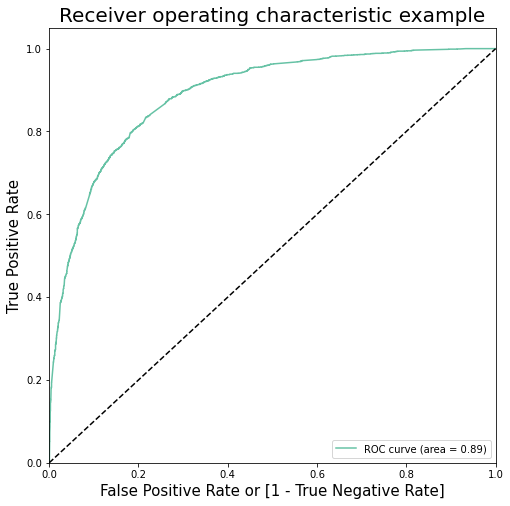

In [125]:
draw_roc(y_train_pred_final.Converted_IND, y_train_pred_final.Converted_Prob)

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -   Area under ROC Curve is 0.89, which is good for a model. 
         
    </span>
</div>

#### 6.7 Finding Optimal Cutoff Point

In [126]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/1000 for x in range(1000)if x%5==0]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND,0.0,0.005,0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.045,0.05,0.055,0.06,0.065,0.07,0.075,0.08,0.085,0.09,0.095,0.1,0.105,0.11,0.115,0.12,0.125,0.13,0.135,0.14,0.145,0.15,0.155,0.16,0.165,0.17,0.175,0.18,0.185,0.19,0.195,0.2,0.205,0.21,0.215,0.22,0.225,0.23,...,0.75,0.755,0.76,0.765,0.77,0.775,0.78,0.785,0.79,0.795,0.8,0.805,0.81,0.815,0.82,0.825,0.83,0.835,0.84,0.845,0.85,0.855,0.86,0.865,0.87,0.875,0.88,0.885,0.89,0.895,0.9,0.905,0.91,0.915,0.92,0.925,0.93,0.935,0.94,0.945,0.95,0.955,0.96,0.965,0.97,0.975,0.98,0.985,0.99,0.995
0,0,0.367221,1871,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.161802,6795,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.340405,3516,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.859708,8105,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.295848,3934,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [127]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['PROBABILITY','ACCURACY','SENSITIVITY','SPECIFICITY','PRECISION','RECALL'])
from sklearn.metrics import confusion_matrix

num = [float(x)/1000 for x in range(1000) if x%5==0]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted_IND'], y_train_pred_final[i] )
    accuracy = (cm1[0,0]+cm1[1,1])/(cm1[0,0]+cm1[0,1]+cm1[1,0]+cm1[1,1])
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prec, rec, thresholds = precision_recall_curve(y_train_pred_final['Converted_IND'], y_train_pred_final[i])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity,prec[1], rec[1]]

#let's view the values
cutoff_df[::10]    

,PROBABILITY,ACCURACY,SENSITIVITY,SPECIFICITY,PRECISION,RECALL
0.00,0.00,0.381262,1.000000,0.000000,1.000000,0.000000
0.05,0.05,0.522109,0.991484,0.232884,0.443336,0.991484
0.10,0.10,0.603123,0.980130,0.370815,0.489767,0.980130
0.15,0.15,0.709647,0.942822,0.565967,0.572378,0.942822
0.20,0.20,0.756957,0.915653,0.659170,0.623412,0.915653
0.25,0.25,0.776902,0.890511,0.706897,0.651825,0.890511
0.30,0.30,0.799165,0.838605,0.774863,0.696531,0.838605
0.35,0.35,0.808751,0.802920,0.812344,0.725009,0.802920
0.40,0.40,0.810761,0.763179,0.840080,0.746233,0.763179
0.45,0.45,0.816017,0.733982,0.866567,0.772184,0.733982


The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

ie When the lead is identified as hot lead and approched the conversion rate should be 80%

 -  As per our problem statement we want to identify more hot leads from our data set which means we need more True positives.
  
 - We dont want to mis identify leads or mis out on hot leads, then both sensitivity (recall) and precision must be considered

In [128]:
# Code to to fetch the probability with precision >80% and has highest accuracy
best_probability = 0.5 #initialisation
best_local_accuracy = 0.5
for prob in cutoff_df.index.to_list():
    if cutoff_df.loc[prob,'PRECISION'] > 0.8:  # 80% ball park given by CEO
        if best_local_accuracy < cutoff_df.loc[prob,'ACCURACY']:
            best_local_accuracy = cutoff_df.loc[prob,'ACCURACY']
            best_probability = prob

print("The best probabilty suggested using code is : ",best_probability, "\n in terms of lead score it's :",best_probability*100)

The best probabilty suggested using code is :  0.535 
 in terms of lead score it's : 53.5


In [129]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted_IND'], y_train_pred_final['Converted_Prob'])

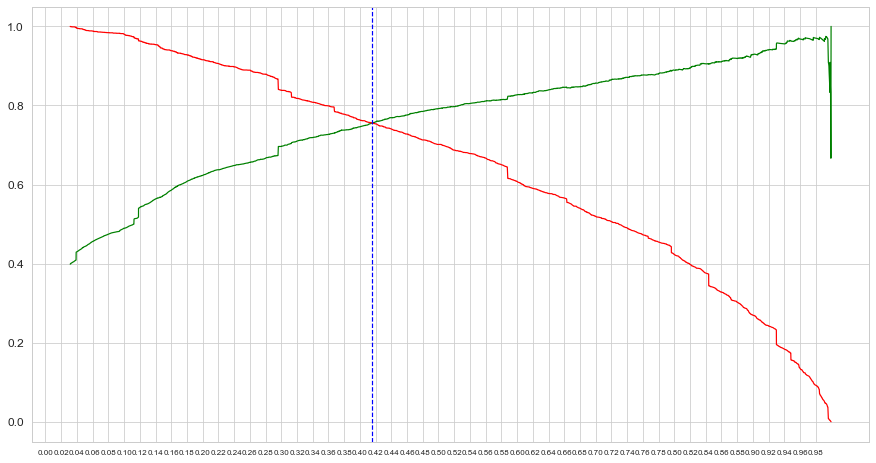

In [130]:
# Plotting the Precision-Recall Trade off Curve
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
sns.set_context("paper")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.415, color='b', linestyle='--') # additing axline
plt.xticks(np.arange(0,1,step=0.02),size=8)
plt.yticks(size=12)

plt.show()

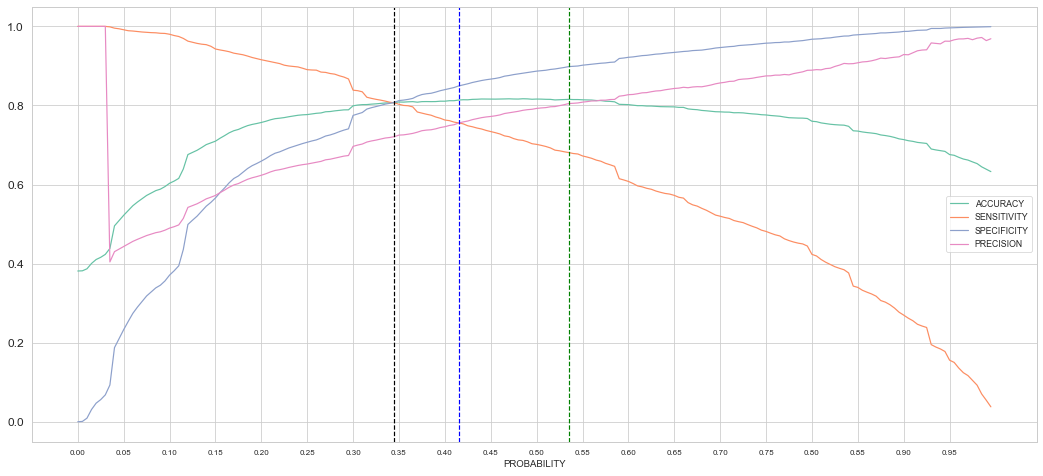

In [131]:
# Let's plot accuracy sensitivity and specificity for above calculated.
sns.set_style("whitegrid")
cutoff_df.plot.line(x='PROBABILITY', y=['ACCURACY','SENSITIVITY','SPECIFICITY','PRECISION']  , figsize =(18,8))
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.345, color='black', linestyle='--',) # additing a line at sensitivity, accuracy and specificity intercection
plt.axvline(x=0.415, color='b', linestyle='--') # additing a line at precisiom recall intersection
plt.axvline(x=0.535, color='green', linestyle='--') # additing a line at best precision and accuracy
plt.yticks(size=12)
plt.show()

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        

  -   From the above graph, probability at 0.535 has an ideal trade off between Precision and Recall
         
         <b>Note : </b><br>  
        

  -   The probability 0.535 has the best accuracy among the probabilities that have precision greater than 80%. it's been derived using code just two cells above.
         
    </span>
</div>

In [132]:
y_train_pred_final = y_train_pred_final[['Converted_IND','Converted_Prob','Prospect_IND']]
y_train_pred_final['lead_score'] = y_train_pred_final['Converted_Prob']*100
y_train_pred_final['Converted_prediction'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.535 else 0)
y_train_pred_final

,Converted_IND,Converted_Prob,Prospect_IND,lead_score,Converted_prediction
0,0,0.367221,1871,36.722090,0
1,0,0.161802,6795,16.180154,0
2,0,0.340405,3516,34.040475,0
3,0,0.859708,8105,85.970776,1
4,0,0.295848,3934,29.584766,0
...,...,...,...,...,...
6463,1,0.607217,350,60.721658,1
6464,1,0.995983,79,99.598316,1
6465,1,0.295848,8039,29.584766,0
6466,0,0.075471,6936,7.547066,0


### 6.8 Evaluation Matrix

#### Accuracy

In [133]:
# Let's check the overall accuracy.
Accuracy_Train = metrics.accuracy_score(y_train_pred_final.Converted_IND, y_train_pred_final.Converted_prediction)
Accuracy_Train

0.8153988868274582

#### Confusion Matrix

In [134]:
CM = confusion_matrix(y_train_pred_final.Converted_IND, y_train_pred_final.Converted_prediction)
CM

array([[3595,  407],
       [ 787, 1679]], dtype=int64)

In [135]:
print(" True Positives = ",CM[1,1],"\n True Negatives = ",CM[0,0],"\n False Positives = ",CM[0,1],"\n False Negatives = ",CM[1,0])

 True Positives =  1679 
 True Negatives =  3595 
 False Positives =  407 
 False Negatives =  787


##### Precision
TP / TP + FP

In [136]:
Precision_Train = CM[1,1]/(CM[0,1]+CM[1,1])
Precision_Train

0.8048897411313519

##### Recall  (or sensitivity)
TP / TP + FN

In [137]:
Recall_Train = CM[1,1]/(CM[1,0]+CM[1,1])
Recall_Train

0.680859691808597

##### Specificity
TN / TN + FP

In [138]:
Specificity_Train = CM[0,0]/(CM[0,0]+CM[0,1])
Specificity_Train

0.8983008495752124

###  Step 7:  Model Evalution (on Test Dataset)

In [139]:
# Applying Scaling on the test dataset :
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Email Opened,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Occupation_Businessman,Occupation_Housewife,Occupation_Not Available,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4269,0,1.749143,0.964504,2.117849,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2376,0,-1.149699,-0.885371,-1.266675,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7766,0,0.662077,-0.777416,1.553761,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9199,0,-1.149699,-0.885371,-1.266675,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4359,0,-1.149699,-0.885371,-1.266675,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [140]:
# Selecting only the columns used in final model of Train Dataset
X_test = X_test[features]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Occupation_Not Available,Occupation_Working Professional,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Activity_Other activities,Last Activity_SMS Sent,Specialization_Others
4269,0,0.964504,0,1,0,0,0,0,1,0,0,0,0,1,1
2376,0,-0.885371,1,0,0,0,0,0,0,0,0,0,0,1,1
7766,0,-0.777416,0,0,0,1,0,0,0,1,0,0,0,0,0
9199,0,-0.885371,0,0,0,0,0,0,0,0,0,1,0,0,1
4359,0,-0.885371,1,0,0,0,0,0,0,0,0,0,0,0,0


In [141]:
#adding contant value
X_test_sm = sm.add_constant(X_test)
# Predicting the test using the final model 
y_test_pred = lrm_final.predict(X_test_sm)
y_test_pred

4269    0.366218
2376    0.929815
7766    0.685567
9199    0.112462
4359    0.843689
          ...   
8649    0.054927
2152    0.929815
7101    0.295848
5331    0.156741
2960    0.929815
Length: 2772, dtype: float64

In [142]:
#Creating a dataframe with the actual Converted flag and the Predicted probabilities to process further
y_test_pred_final = pd.DataFrame({
    'Converted_IND':y_test.values,
    'Converted_Prob':y_test_pred.values.reshape(-1),
    'Prospect_IND':y_test.index
})
y_test_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND
0,1,0.366218,4269
1,1,0.929815,2376
2,1,0.685567,7766
3,0,0.112462,9199
4,1,0.843689,4359


In [143]:
y_test_pred_final['lead_score'] = y_test_pred_final['Converted_Prob']*100
y_test_pred_final['Converted_prediction'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.535 else 0)
y_test_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND,lead_score,Converted_prediction
0,1,0.366218,4269,36.621786,0
1,1,0.929815,2376,92.981530,1
2,1,0.685567,7766,68.556670,1
3,0,0.112462,9199,11.246185,0
4,1,0.843689,4359,84.368903,1


#### Accuracy

In [144]:
# Let's check the accuracy for test datset.
Accuracy_Test = metrics.accuracy_score(y_test_pred_final.Converted_IND, y_test_pred_final.Converted_prediction)
Accuracy_Test

0.803030303030303

#### Confusion Matrix

In [145]:
CM_test = confusion_matrix(y_test_pred_final.Converted_IND, y_test_pred_final.Converted_prediction)
CM_test

array([[1517,  160],
       [ 386,  709]], dtype=int64)

In [146]:
print(" True Positives = ",CM_test[1,1],"\n True Negatives = ",CM_test[0,0],"\n False Positives = ",CM_test[0,1],"\n False Negatives = ",CM_test[1,0])

 True Positives =  709 
 True Negatives =  1517 
 False Positives =  160 
 False Negatives =  386


##### Precision
TP / TP + FP

In [147]:
Precision_Test = CM_test[1,1]/(CM_test[0,1]+CM_test[1,1])
Precision_Test

0.8158803222094362

##### Recall  (or sensitivity)
TP / TP + FN

In [148]:
Recall_Test = CM_test[1,1]/(CM_test[1,0]+CM_test[1,1])
Recall_Test

0.6474885844748859

##### Specificity
TN / TN + FP

In [149]:
Specificity_Test = CM_test[0,0]/(CM_test[0,0]+CM_test[0,1])
Specificity_Test

0.9045915324985092

In [150]:
#let's check the lead score
y_test_pred_final.head(10)

,Converted_IND,Converted_Prob,Prospect_IND,lead_score,Converted_prediction
0,1,0.366218,4269,36.621786,0
1,1,0.929815,2376,92.981530,1
2,1,0.685567,7766,68.556670,1
3,0,0.112462,9199,11.246185,0
4,1,0.843689,4359,84.368903,1
5,1,0.648815,9186,64.881487,1
6,1,0.542630,1631,54.262992,1
7,1,0.168333,8963,16.833253,0
8,0,0.031037,8007,3.103720,0
9,1,0.434595,5324,43.459512,0


#### To compare the metrics of Train and Trest data

In [151]:
print("\t \t Train  \t Test")
print("Accuracy   \t", round(Accuracy_Train,2) ,'\t\t', round(Accuracy_Test,2))
print("Precision  \t", round(Precision_Train,2) ,'\t\t', round(Precision_Test,2))
print("Recall     \t", round(Recall_Train,2) ,'\t\t', round(Recall_Test,2))
print("Specificity\t", round(Specificity_Train,2) ,'\t\t', round(Specificity_Test,2))

	 	 Train  	 Test
Accuracy   	 0.82 		 0.8
Precision  	 0.8 		 0.82
Recall     	 0.68 		 0.65
Specificity	 0.9 		 0.9


<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        

  -  The Model has a good accuracy of 82% and 80% respectively on both Train and Test data. 
  
  -  The Model seems to be a good fit. It's neither over fitting nor under fitting.
        
  -  The Model has precision over 80% for both train and test datasets, which was the ball pary given by the client (CEO).
         
    </span>
</div>

###  Step 8:  Conclusion

#### 8.1 Model Features / Predictors

In [152]:
# coefficients of final model

lrm_final.params

const                                    0.394648
Do Not Email                            -1.394574
Total Time Spent on Website              1.060354
Lead Origin_Lead Add Form                2.230094
Lead Source_Direct Traffic              -1.722602
Lead Source_Facebook                    -1.656503
Lead Source_Google                      -1.250309
Lead Source_Organic Search              -1.406921
Lead Source_Referral Sites              -1.270930
Occupation_Not Available                -1.141158
Occupation_Working Professional          2.459470
Last Activity_Converted to Lead         -1.172836
Last Activity_Olark Chat Conversation   -1.198687
Last Activity_Other activities           1.603956
Last Activity_SMS Sent                   1.220911
Specialization_Others                   -0.322992
dtype: float64

<AxesSubplot:>

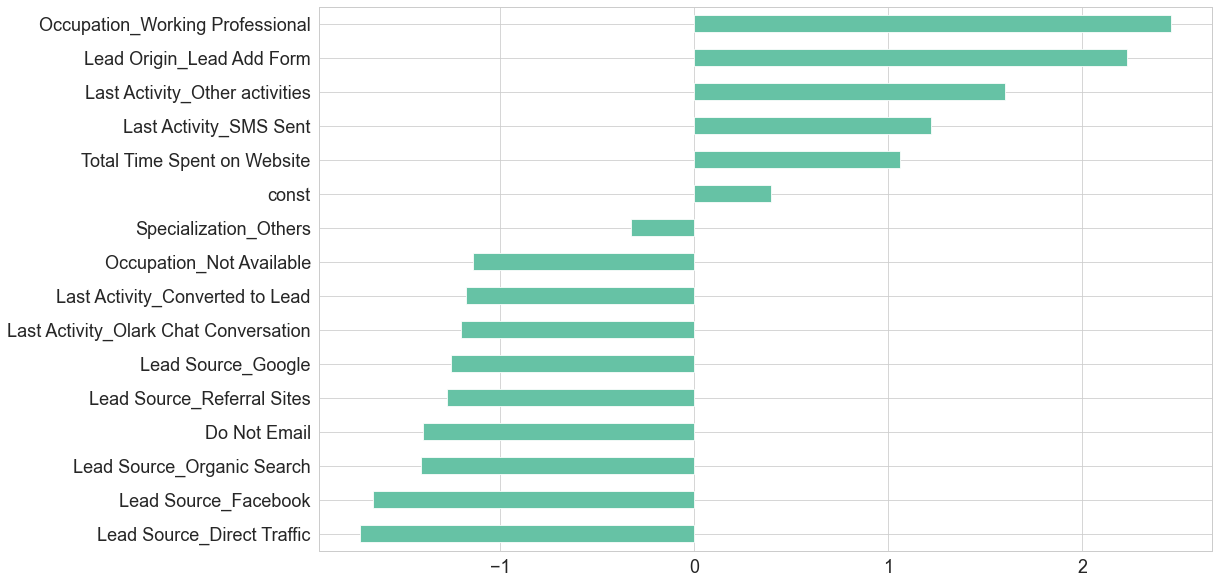

In [153]:
#To visualise the coefficients

lrm_final.params.sort_values().plot.barh(figsize=(16,10), fontsize=18)

#### 8.2 Model Summary

<p style="font-size:16px">
    log(p/(1-p)) =  0.394648 * const + 2.230094 * Lead Origin_Lead Add Form + 1.060354  * Total Time Spent on Website <br>
    + 2.459470 * Occupation_Working Professional + 1.220911 * Last Activity_SMS Sent - 1.394574 * Do Not Email <br>
    - 1.722602 * Lead Source_Direct Traffic &nbsp;&nbsp; - 1.656503 * Lead Source_Facebook <br>
    - 1.250309 * Lead Source_Google  &nbsp;&nbsp;&nbsp; - 1.406921 * Lead Source_Organic Search <br>
    - 1.270930 * Lead Source_Referral Sites &nbsp; - 1.141158 * Occupation_Not Available <br>      
    - 1.172836 * Last Activity_Converted to Lead &nbsp;- 1.198687 * Last Activity_Olark Chat Conversation <br> 
    + 1.603956 * Last Activity_Other activities &nbsp; - 0.322992 * Specialization_Others <br>
</p>

<div class="alert alert-block alert-info">
    <span>
      <b>Conclusion : </b><br>  
        
Based on the model metrics the lead conversion rate is 80% meeting the condition of the CEO, this model is the optimal model for the lead score analysis for X-Education company. We can use the lead_score column to identify which potential leads to prioritize first. The higher the score, the higher chances are there for the lead to convert.
        
  -  When we have few sales representative and need a 80% conversion rate we can pick everyone above the lead_score cut off of 53.5
  -  When we have people to spare and can make more calls, then we can take the leads with lead score more than 41.5.    
  -  When the sales requirement is met and more calls must be done only if they know for sure, one must pick the highest lead scorer from the list given.        
    </span>
</div>

<div class="alert alert-block alert-info">
    <span>
      <b>Recommendations : </b><br>  
        
X-Education company has a better chance of converting a potential lead when:

- Occupation_Working Professional: Working professionals have a near 90% conversion and Housewives have near 100% conversion rate, however they have low in number of leads. Hence people from these two categories should be more approached.

- Lead Origin_Lead Add Form:  Landing page submission and API have given more number of leads even if the conversion rate is less than half. Hence targeting the people submitting forms come on priority especially if they are working professionals.

- Last Activity_Other activities: Targeting the Customers with other activities is good as they have a high conversion rate even if they are with less frequency.

- Total Time Spent on Website: Based on EDA customers spending more time on website have more chances of conversion, hence targeting them is recommended. 

- Last Activity_SMS Sent: SMS Sent is second most frequent , and has near 60% conversion rate.
    </span>
</div>
